#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company wants to know:

##### Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house. Also, determine the optimal value of lambda for ridge and lasso regression.

##### The Methods used in this ipynb file are

1. First I imported some impotant python libraries
2. Then I loaded the data file
3. Basic checks on the datasets
4. Cleaning the data by Nan values handling, missing values handling and outliers removal
5. Removing colums with Null above 15 %
6.  Imputation of missing values with None
7. EDA
8. Dropping columns with no or very less variance
9. Working with Years columns
10. Checking skewedness and fixing it
11. Plotting counter plots , box plots,pair plots comparing different columns
12. Findings from plot mentioned
13. Checking corelation from the plots
14. Train-Test split
15. Double checks for Nans and fixing them
16. Adding dummy variables
17. Linear regression on both train and test
18. Result for test not good so removing columns with high VIF
19. Building first Model.
20. Find multicollenearity so another model to be developed
21. Final Model develop
22. Final model evaluation
23. Linear model coeffs and features and observation
24. Residual analysis for test and train
25. lasso regression 
26. Ridge regression
27. Ridge and linear model coeffs and features and observation and optimal value of lambda/alpha
28. Train evaluation with alpha
29. Test evaluation with alpha
30. Comparisons of Linear, Lasso and Ridge metrics and final values for R2, adj R2, RSS, MSE on both Train and test for Linear , Ridge and lasso
31. Conclusions and observation are in this notebook as you go thru it and final observation at bottom

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [4]:
#import data
df = pd.read_csv(r"Downloads\train_surprise_housing.csv")

## Data Understanding, Exploration & Cleaning - EDA

In [6]:
df.shape

(1460, 81)

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Checking columns which have NULL values

In [10]:
import missingno as mno

<Axes: >

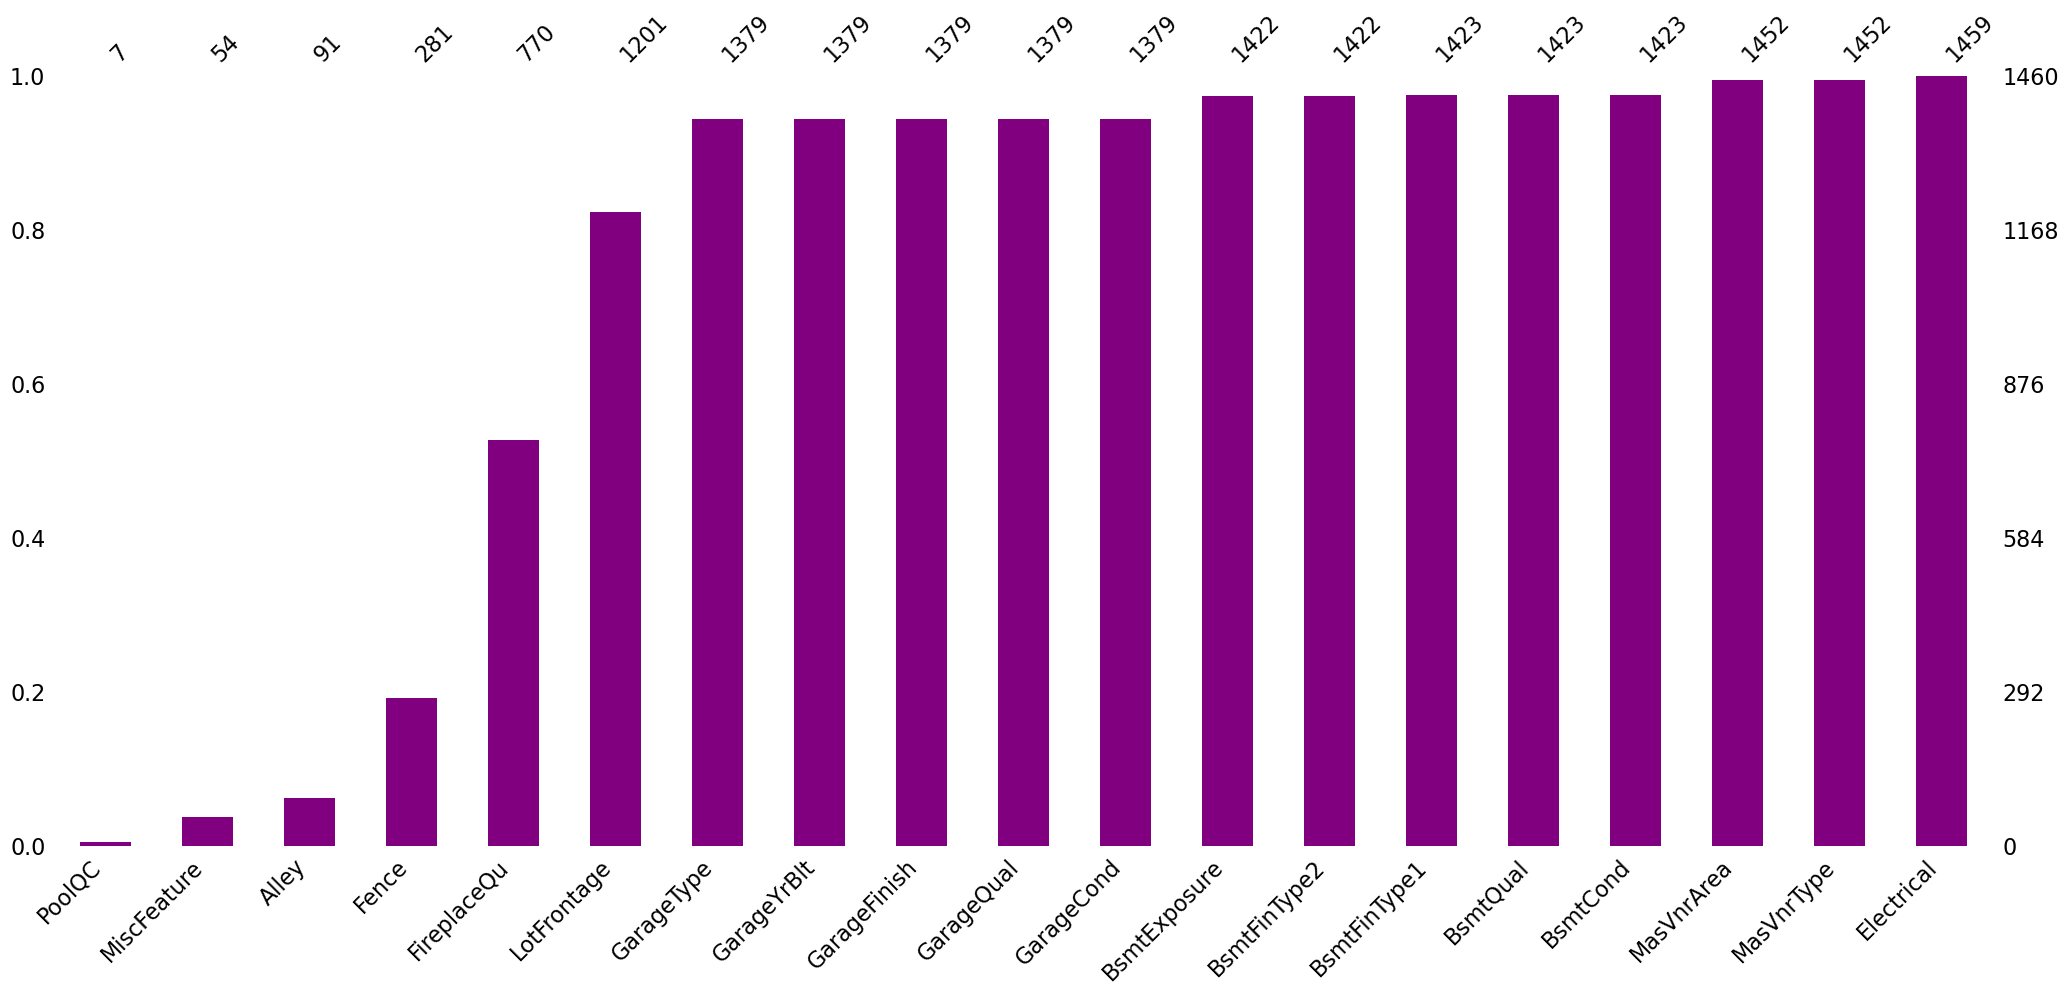

In [11]:
mno.bar(df[df.columns[df.isna().any()]], sort="ascending", color='purple')

#### So few columns have null values.getting the count

In [14]:
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


#### Dropping NULLs for columns above 15%¶

In [15]:
null_data[ null_data['Percentage'] > 15].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [16]:
# Dropping these columns from the dataframe `df`
df.drop(columns=null_data[ null_data['Percentage'] > 15].index, inplace=True)


In [17]:
df.shape

(1460, 75)

In [18]:
null_data = null_data[null_data['Percentage'] < 15]
null_data

,Count,Percentage
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247


#### checking null < 15

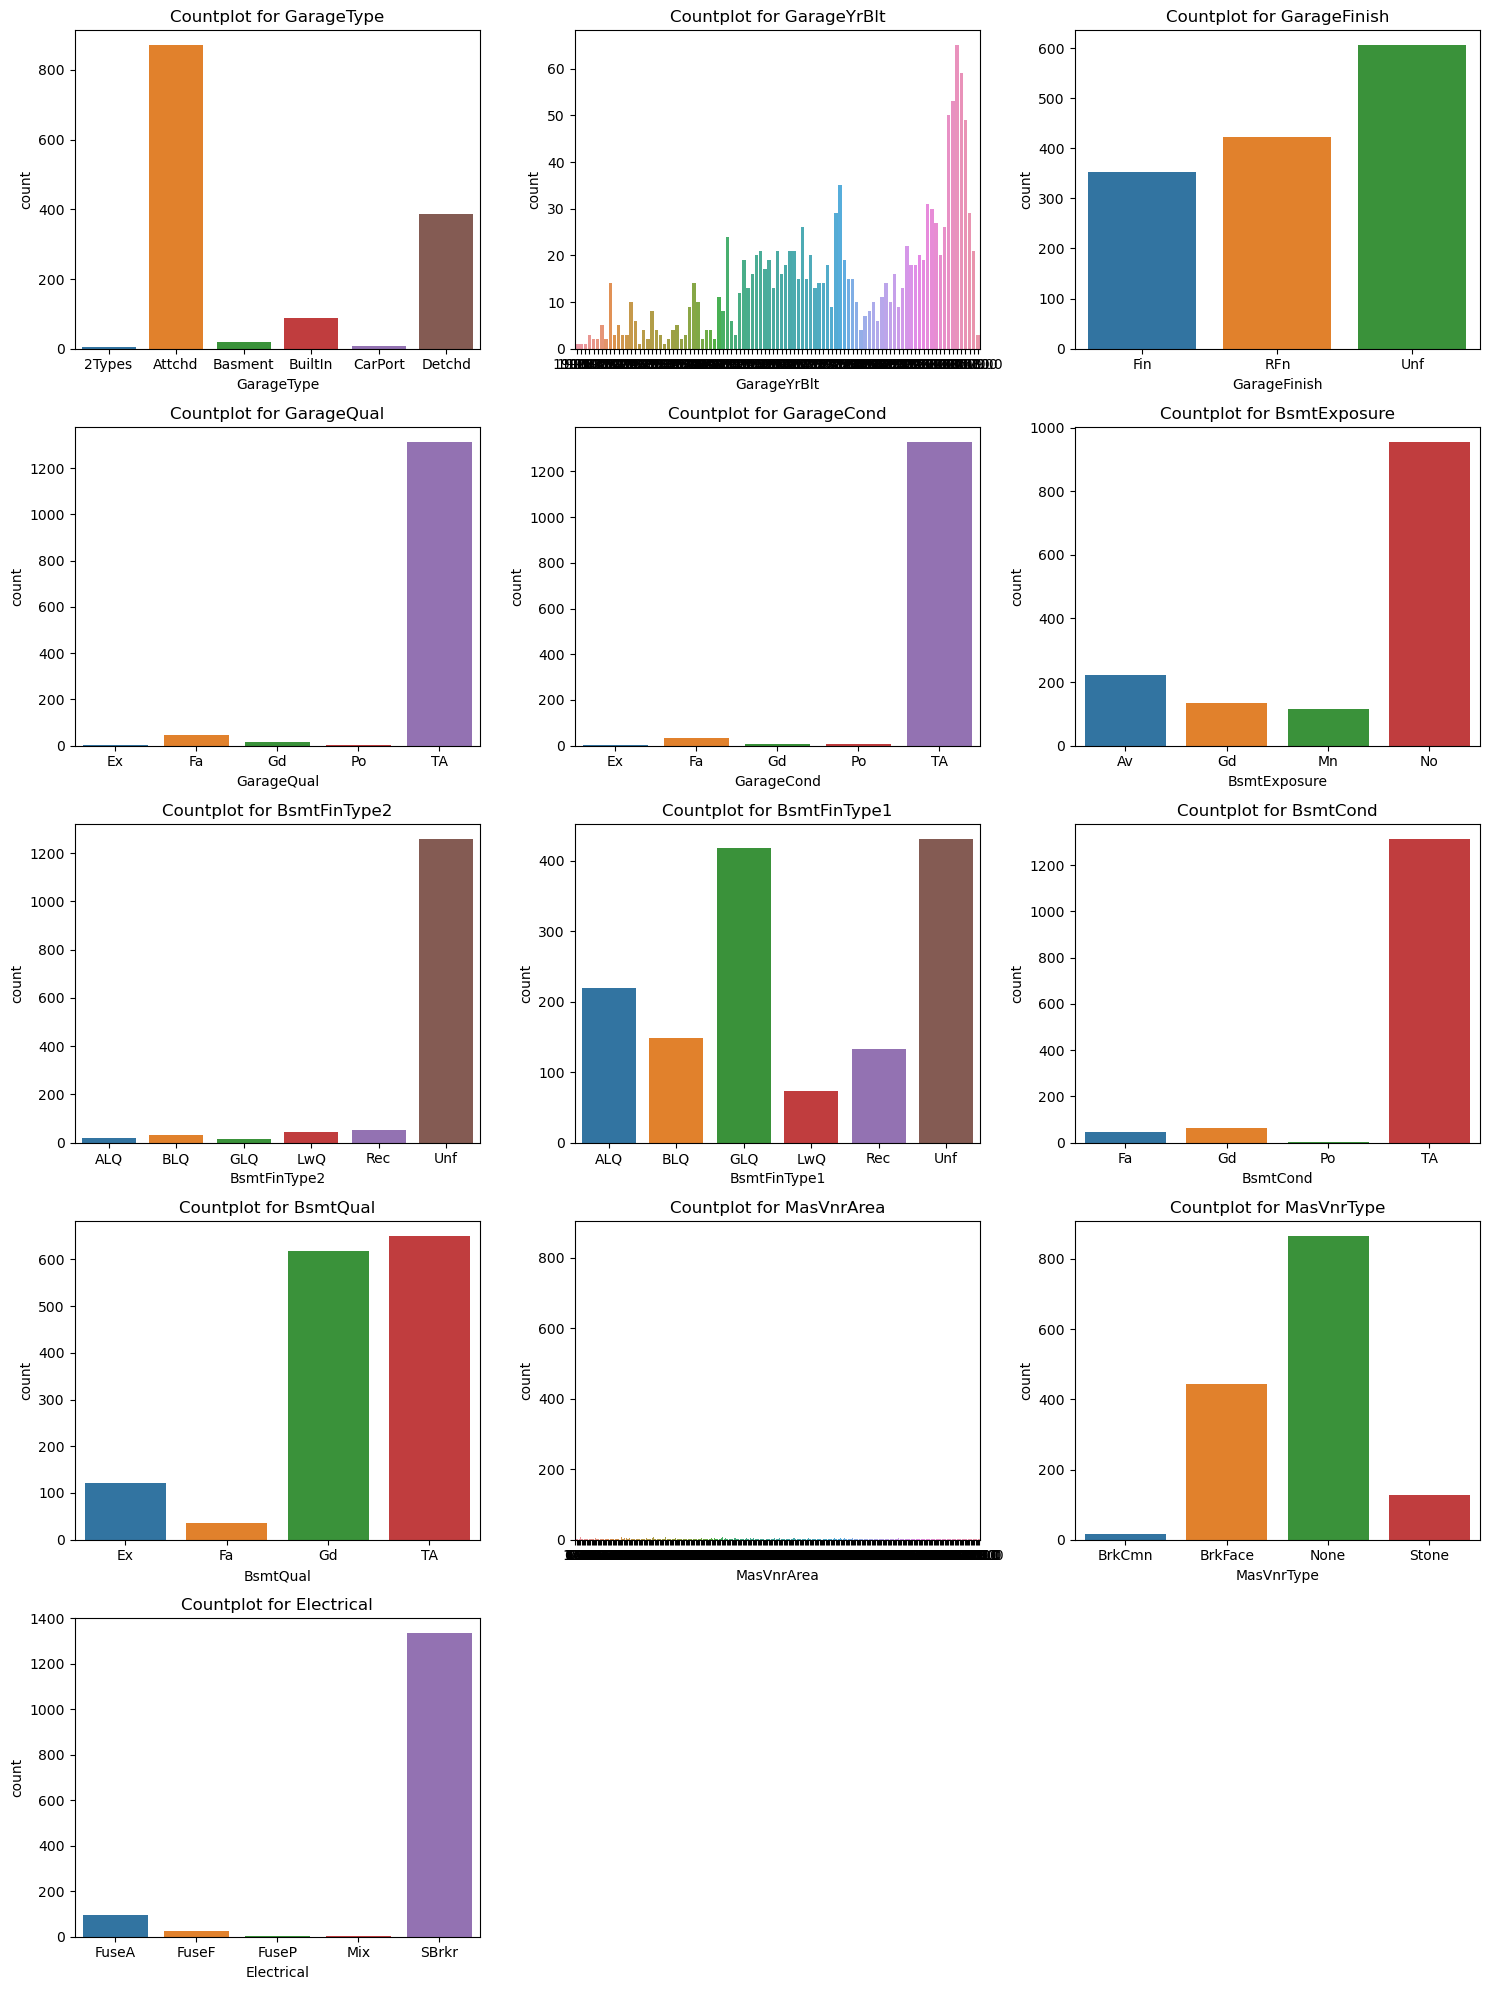

In [21]:
columns_with_nulls = null_data.index

# Setting up the subplots
plt.figure(figsize=(15, 20))

# Loop through each column
for i, var in enumerate(columns_with_nulls, start=1):
    plt.subplot(5, 3, i)
    # Ensuring the column is treated as a category
    sns.countplot(x=df[var].astype('category'))
    plt.title(f"Countplot for {var}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### For these columns, we will perform imputation using the below approach:¶
###### If the column is categorical, we will use mode() to replace the missing values
###### If the column is numerical, we will use median() to replace the missing values
###### If the column value NA has a meaningful value (For e.g. GarageType = NA refers to "No Garage"). We will replace these values with None

In [25]:
# Impute "GarageType" with 'None' as it has a meaningful value
df['GarageType'].fillna('None', inplace=True)
# Impute "GarageFinish" and GarageQual with 'None' as it has a meaningful value
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
# Impute "BsmtExposure" with 'None' as it has a meaningful value
df['BsmtExposure'].fillna('None', inplace=True)
# Impute "BsmtFinType2" with 'None' as it has a meaningful value
df['BsmtFinType2'].fillna('None', inplace=True)
# Impute "BsmtFinType1" with 'None' as it has a meaningful value
df['BsmtFinType1'].fillna('None', inplace=True)
# Impute "BsmtCond" with 'None' as it has a meaningful value
df['BsmtCond'].fillna('None', inplace=True)
# Impute "BsmtQual" with 'None' as it has a meaningful value
df['BsmtQual'].fillna('None', inplace=True)
# Impute "MasVnrArea" with Median value
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
# Impute "MasVnrType" with Mode value
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
# Impute "Electrical" with Mode value
val = df['Electrical'].mode()[0]
df['Electrical'].fillna(val, inplace=True)

In [26]:
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
GarageYrBlt,81,5.547945
GarageCond,81,5.547945


['Pave' 'Grvl']


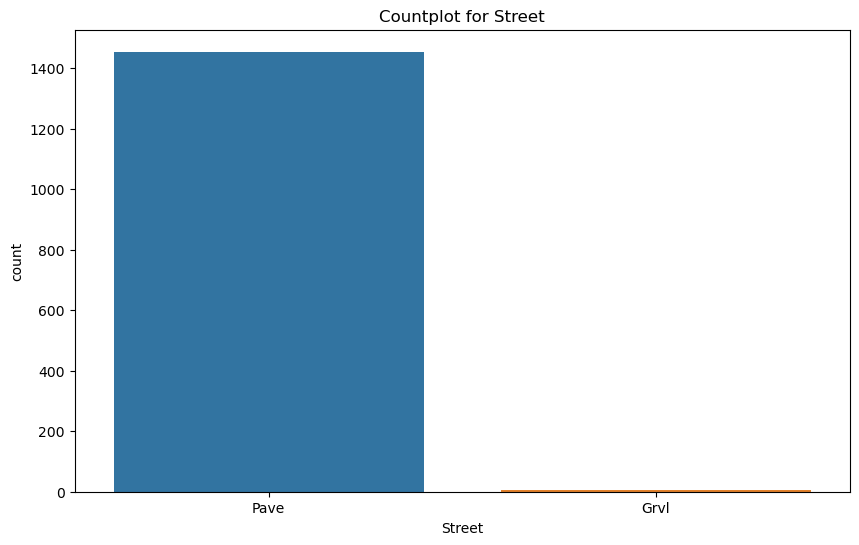

In [28]:
# Dropping "Street" as it doesn't contain much variance. Most values are assigned to "Pave"
# Check unique values in 'Street' column
print(df['Street'].unique())

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Street'])
plt.title('Countplot for Street')
plt.show()

In [29]:
# Drop the 'Street' column as it does not contain much variance
df.drop(columns='Street', inplace=True)

In [32]:
print(df['Condition2'].unique())
print(df['Condition2'].dtype)

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
object


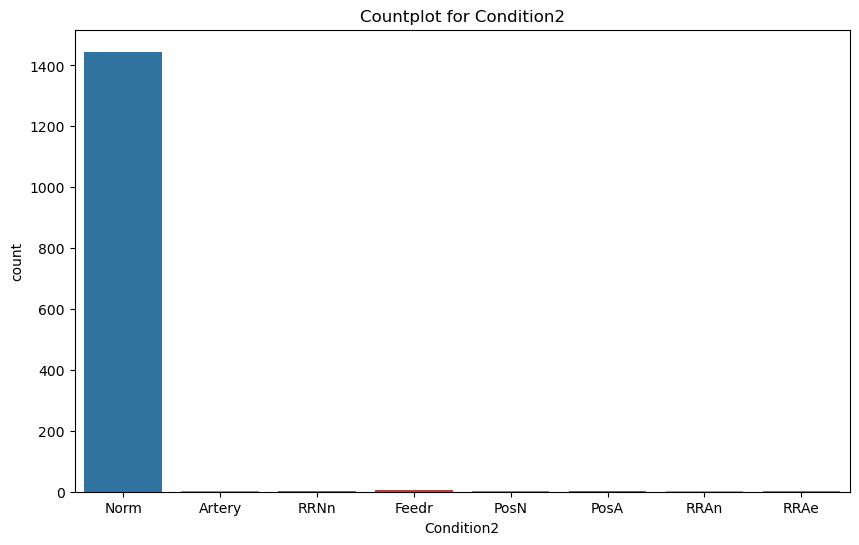

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Condition2'])
plt.title('Countplot for Condition2')
plt.show()

In [34]:
df.drop(columns='Condition2', inplace=True)

In [36]:
print(df['RoofMatl'].unique())
print(df['RoofMatl'].dtype)

['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
object


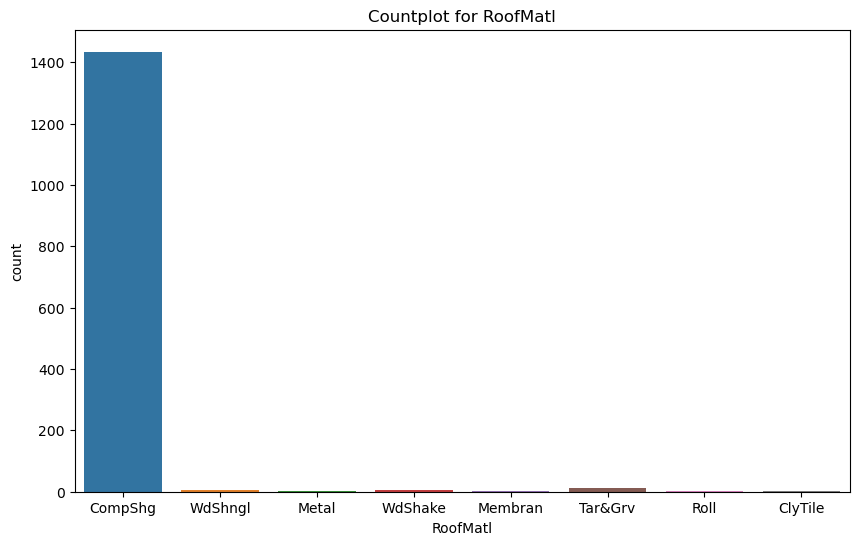

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['RoofMatl'])
plt.title('Countplot for RoofMatl')
plt.show()

In [38]:
df.drop(columns='RoofMatl', inplace=True)

In [39]:
print(df['Heating'].unique())
print(df['Heating'].dtype)

['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
object


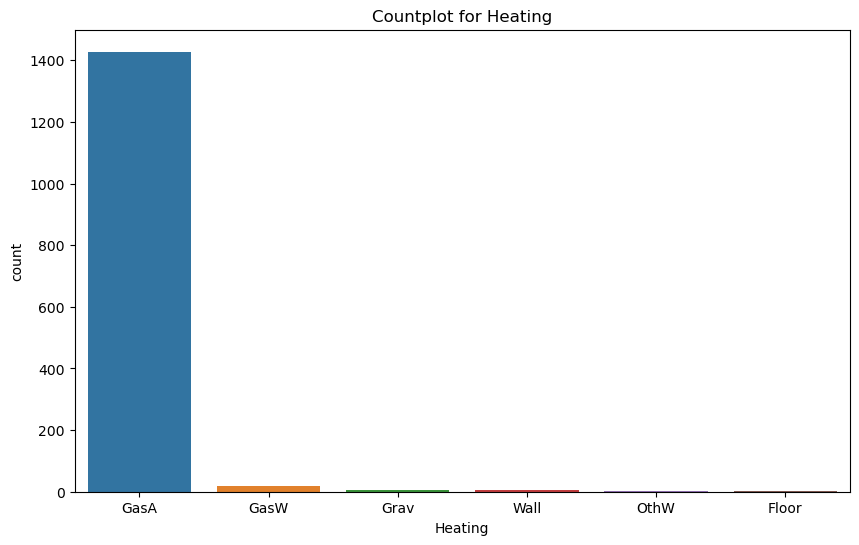

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Heating'])
plt.title('Countplot for Heating')
plt.show()

In [41]:
df.drop(columns='Heating', inplace=True)

In [42]:
print(df['LowQualFinSF'].unique())
print(df['LowQualFinSF'].dtype)

[  0 360 513 234 528 572 144 392 371 390 420 473 156 515  80  53 232 481
 120 514 397 479 205 384]
int64


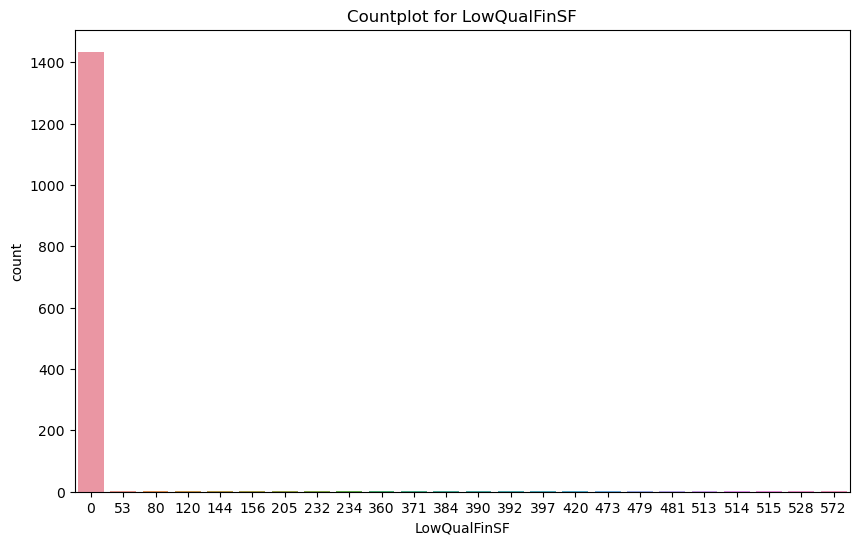

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['LowQualFinSF'])
plt.title('Countplot for LowQualFinSF')
plt.show()

In [44]:
df.drop(columns='LowQualFinSF', inplace=True)

In [45]:
# Dropping "Id" columns as it's not important
df.drop(columns='Id', inplace=True)

In [46]:
print(df['3SsnPorch'].unique())
print(df['3SsnPorch'].dtype)

[  0 320 407 130 180 168 140 508 238 245 196 144 182 162  23 216  96 153
 290 304]
int64


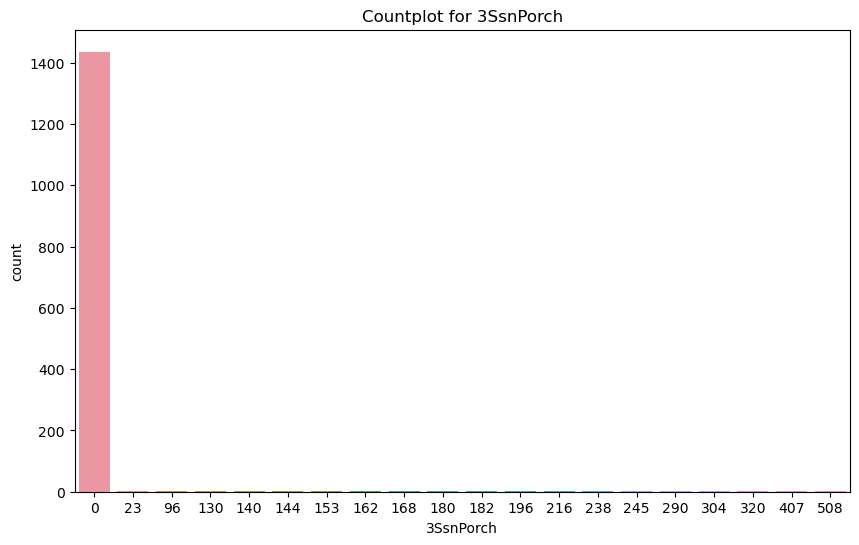

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['3SsnPorch'])
plt.title('Countplot for 3SsnPorch')
plt.show()

In [48]:
df.drop(columns='3SsnPorch', inplace=True)

[  0 176 198 291 252  99 184 168 130 142 192 410 224 266 170 154 153 144
 128 259 160 271 234 374 185 182  90 396 140 276 180 161 145 200 122  95
 120  60 126 189 260 147 385 287 156 100 216 210 197 204 225 152 175 312
 222 265 322 190 233  63  53 143 273 288 263  80 163 116 480 178 440 155
 220 119 165  40]
int64


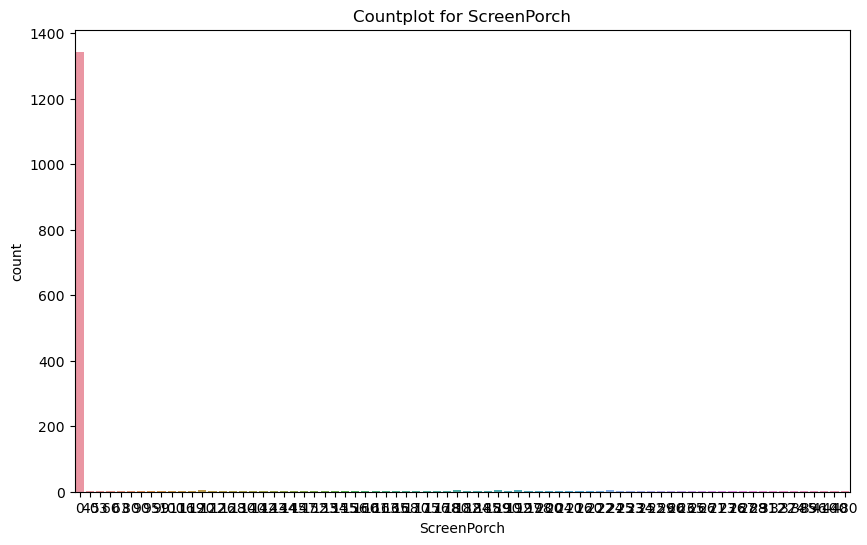

In [49]:
print(df['ScreenPorch'].unique())
print(df['ScreenPorch'].dtype)
plt.figure(figsize=(10, 6))
sns.countplot(x=df['ScreenPorch'])
plt.title('Countplot for ScreenPorch')
plt.show()
df.drop(columns='ScreenPorch', inplace=True)

[  0 512 648 576 555 480 519 738]
int64


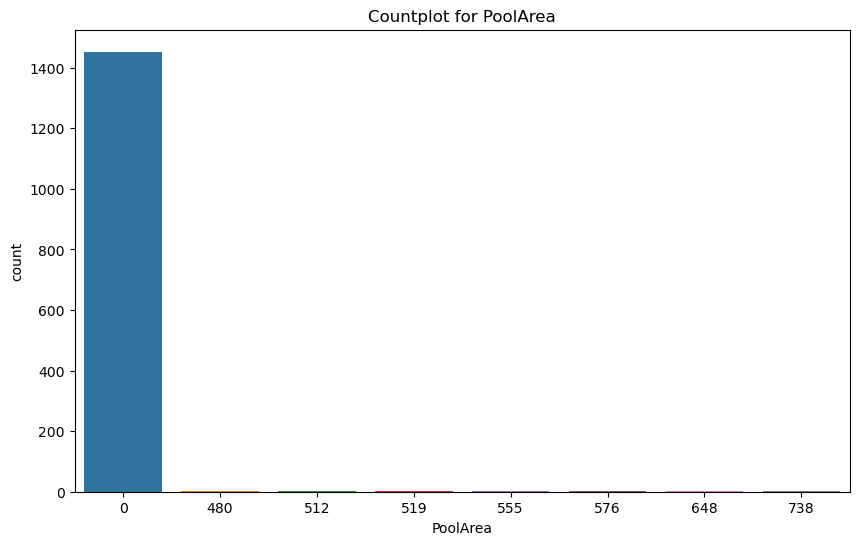

In [50]:
print(df['PoolArea'].unique())
print(df['PoolArea'].dtype)
plt.figure(figsize=(10, 6))
sns.countplot(x=df['PoolArea'])
plt.title('Countplot for PoolArea')
plt.show()
df.drop(columns='PoolArea', inplace=True)

[    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500]
int64


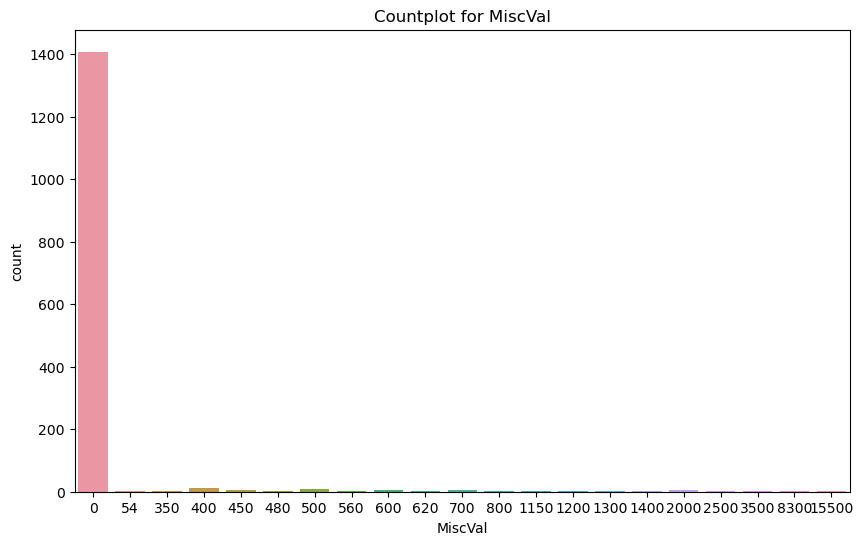

In [51]:
print(df['MiscVal'].unique())
print(df['MiscVal'].dtype)
plt.figure(figsize=(10, 6))
sns.countplot(x=df['MiscVal'])
plt.title('Countplot for MiscVal')
plt.show()
df.drop(columns='MiscVal', inplace=True)

['AllPub' 'NoSeWa']
object


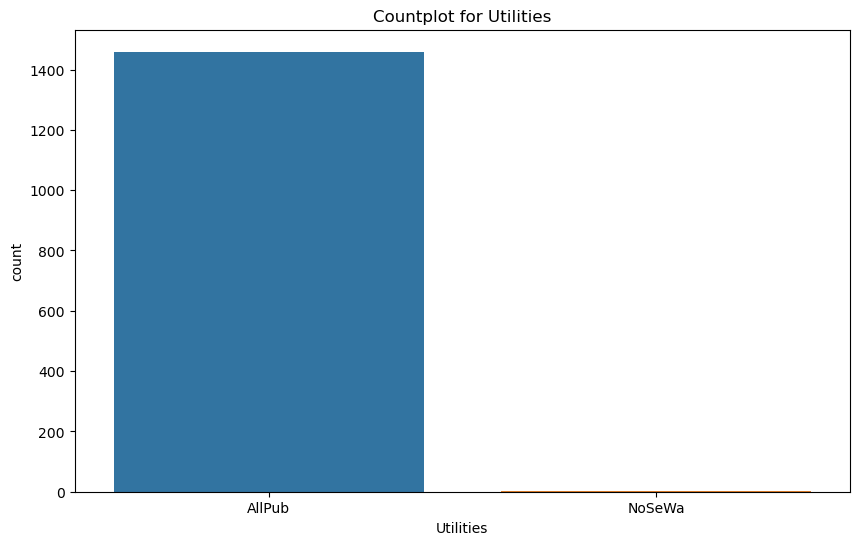

In [52]:
print(df['Utilities'].unique())
print(df['Utilities'].dtype)
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Utilities'])
plt.title('Countplot for Utilities')
plt.show()
df.drop(columns='Utilities', inplace=True)

In [53]:
df.shape

(1460, 64)

In [54]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,TA,Y,0,61,0,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,TA,Y,298,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,TA,Y,0,42,0,9,2008,WD,Normal,223500
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,TA,Y,0,35,272,2,2006,WD,Abnorml,140000
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,TA,Y,192,84,0,12,2008,WD,Normal,250000


#### working with year colums

In [55]:
CurrentYear = 2021

In [56]:
df['Age_Built_Years'] = CurrentYear - df['YearBuilt']
df['Age_RemodAdd_Years'] = CurrentYear - df['YearRemodAdd']
df['Age_GarageYrBlt_Years'] = CurrentYear - df['GarageYrBlt']
df['Age_YrSold_Years'] = CurrentYear - df['YrSold']

In [57]:
df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], inplace=True)

In [58]:
df.shape

(1460, 64)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1460 non-null   int64  
 1   MSZoning               1460 non-null   object 
 2   LotArea                1460 non-null   int64  
 3   LotShape               1460 non-null   object 
 4   LandContour            1460 non-null   object 
 5   LotConfig              1460 non-null   object 
 6   LandSlope              1460 non-null   object 
 7   Neighborhood           1460 non-null   object 
 8   Condition1             1460 non-null   object 
 9   BldgType               1460 non-null   object 
 10  HouseStyle             1460 non-null   object 
 11  OverallQual            1460 non-null   int64  
 12  OverallCond            1460 non-null   int64  
 13  RoofStyle              1460 non-null   object 
 14  Exterior1st            1460 non-null   object 
 15  Exte

In [60]:
# Getting categorical variables
cat_var = df.select_dtypes(include='object').columns
cat_var

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [61]:
# Getting numerical variables
num_var = df.select_dtypes(exclude='object').columns
num_var

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SalePrice', 'Age_Built_Years',
       'Age_RemodAdd_Years', 'Age_GarageYrBlt_Years', 'Age_YrSold_Years'],
      dtype='object')

<Figure size 2000x1500 with 0 Axes>

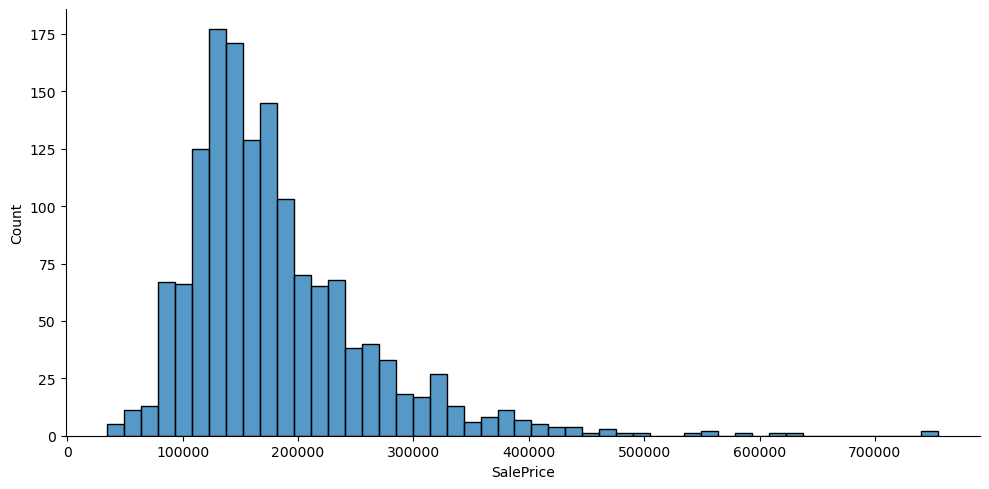

In [62]:
plt.figure(figsize=[20,15])
sns.displot(df['SalePrice'], aspect=2)
plt.show()

##### Looking at the distribution, we can see that the distribution is skewed towards the right (i.e. outliers on data with high Sales Price). This indicates the presence of outliers.
In such cases, we cannot cap the values as Linear Regression models are interpolated and not extrapolated (i.e. Model will make wrong predictions in case of high Sales Prices).

In [63]:
df['SalePrice'].skew()

1.8828757597682129

##### The rule of thumb for checking skewness:

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
If the skewness is less than -1 or greater than 1, the data are highly skewed
As skewness is more than 1, in our case, we conclude that the column SalePrice is highly skewed

In [64]:
df['SalePrice'].kurtosis()

6.536281860064529

Note

kurtosis measures the tail-heaviness of the distribution
For a normal distribution, kurtosis value is 3
As kurtosis value increase, the tail heaviness also increases and vice-versa
In our case as the kurtosis value is more than ~6.5, distribution tail is heavier

Handling SalePrice high skewness and kurtosis
To handle this, we will perform Log Transformation on "SalePrice" column. This will transform the variable and make it as normally distributed as possible. Basically it reduces the skewness in the data.

<Figure size 2000x1500 with 0 Axes>

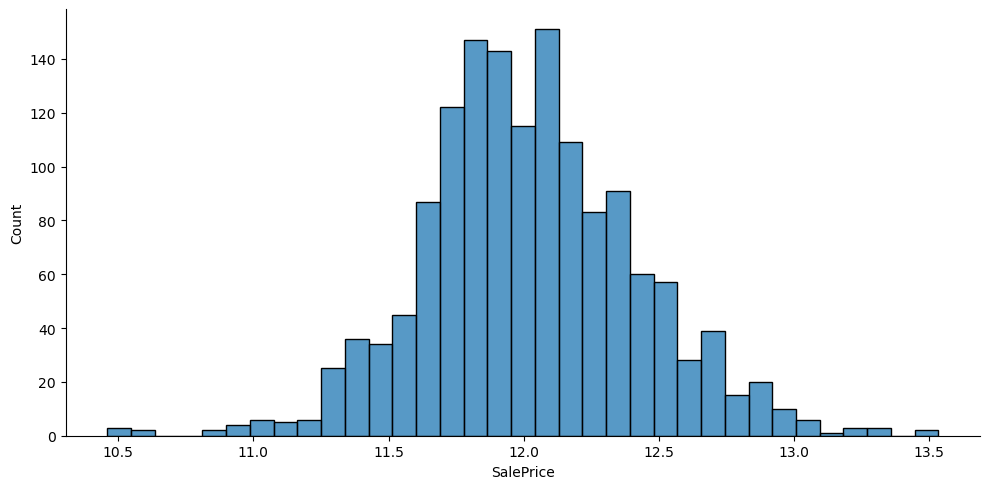

In [65]:
# Plotting distribution of a log transformed "SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(np.log(df['SalePrice']), aspect=2)
plt.show()

now its look normal

In [66]:
# Create Log Transformed "SalePrice" column
df['Transformed_SalePrice'] = np.log(df['SalePrice'])

<Figure size 2000x1500 with 0 Axes>

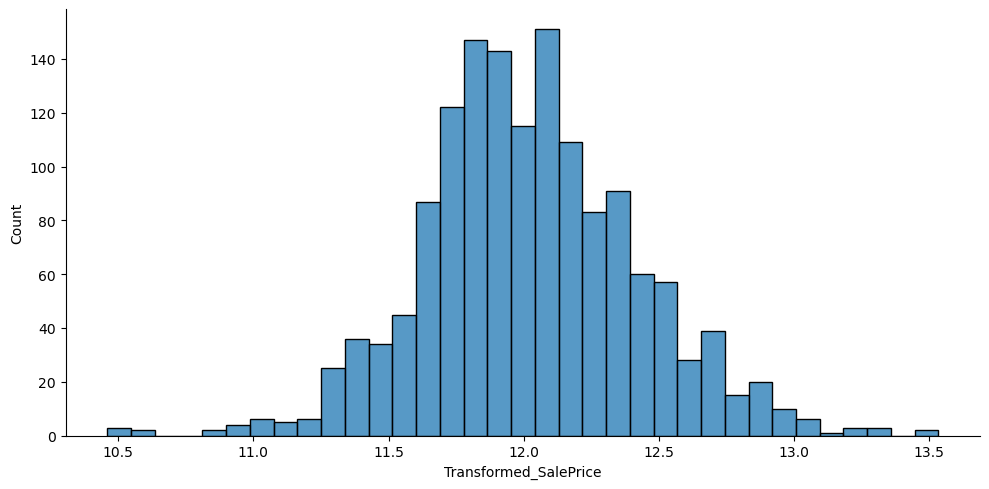

In [67]:
# Plotting distribution of a "Transformed_SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(df['Transformed_SalePrice'], aspect=2)
plt.show()

In [68]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,EnclosedPorch,MoSold,SaleType,SaleCondition,SalePrice,Age_Built_Years,Age_RemodAdd_Years,Age_GarageYrBlt_Years,Age_YrSold_Years,Transformed_SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,0,2,WD,Normal,208500,18,18,18.0,13,12.247694
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,0,5,WD,Normal,181500,45,45,45.0,14,12.109011
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,0,9,WD,Normal,223500,20,19,20.0,13,12.317167
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,272,2,WD,Abnorml,140000,106,51,23.0,15,11.849398
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,0,12,WD,Normal,250000,21,21,21.0,13,12.429216


In [69]:
df.shape

(1460, 65)

#### EDA

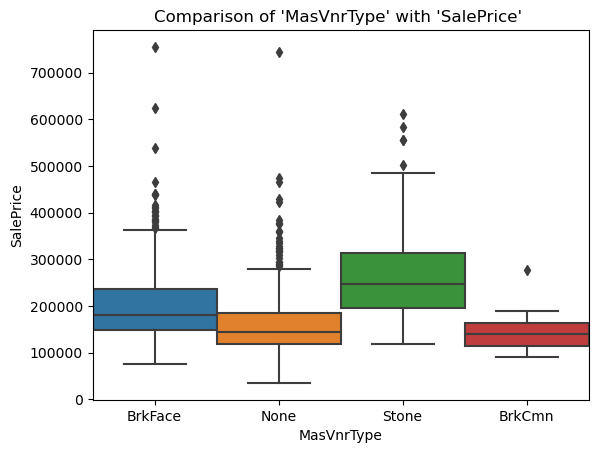

In [70]:
var = 'MasVnrType'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

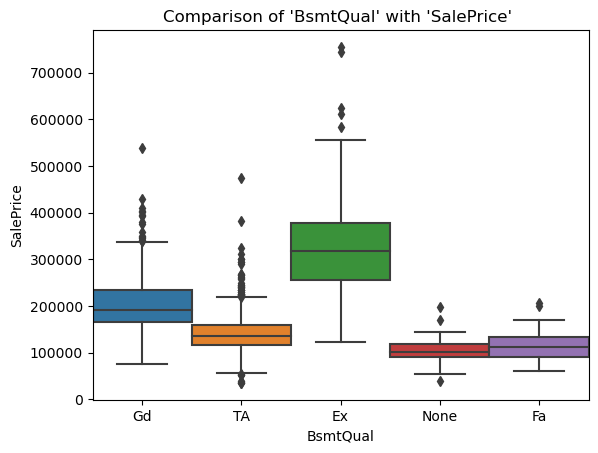

In [71]:
var = 'BsmtQual'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

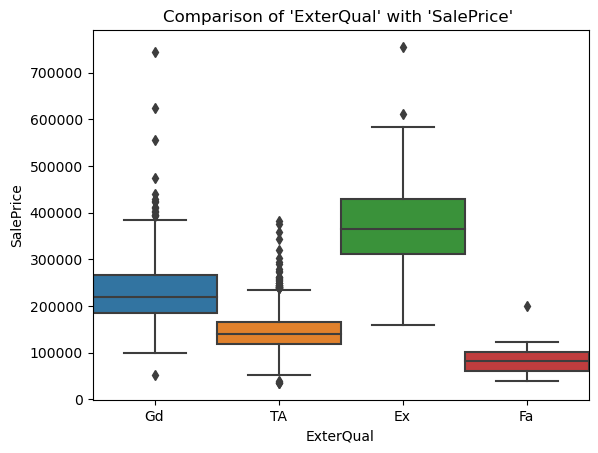

In [72]:
var = 'ExterQual'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

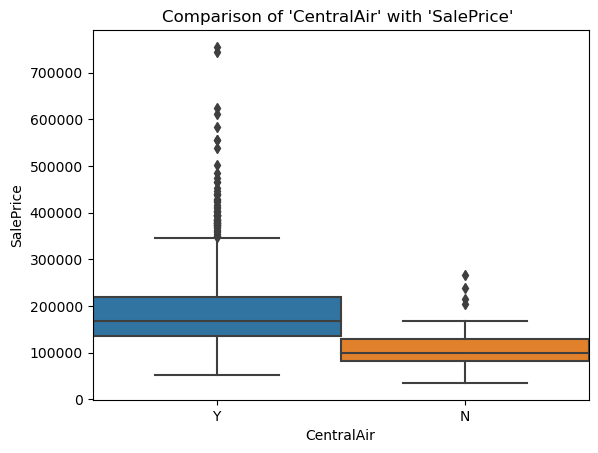

In [73]:
var = 'CentralAir'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

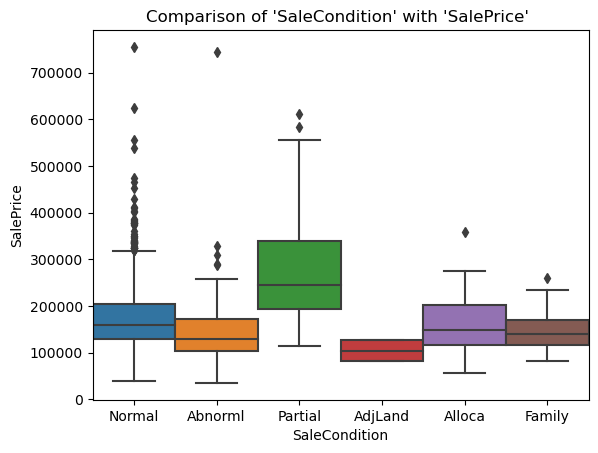

In [74]:
var = 'SaleCondition'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

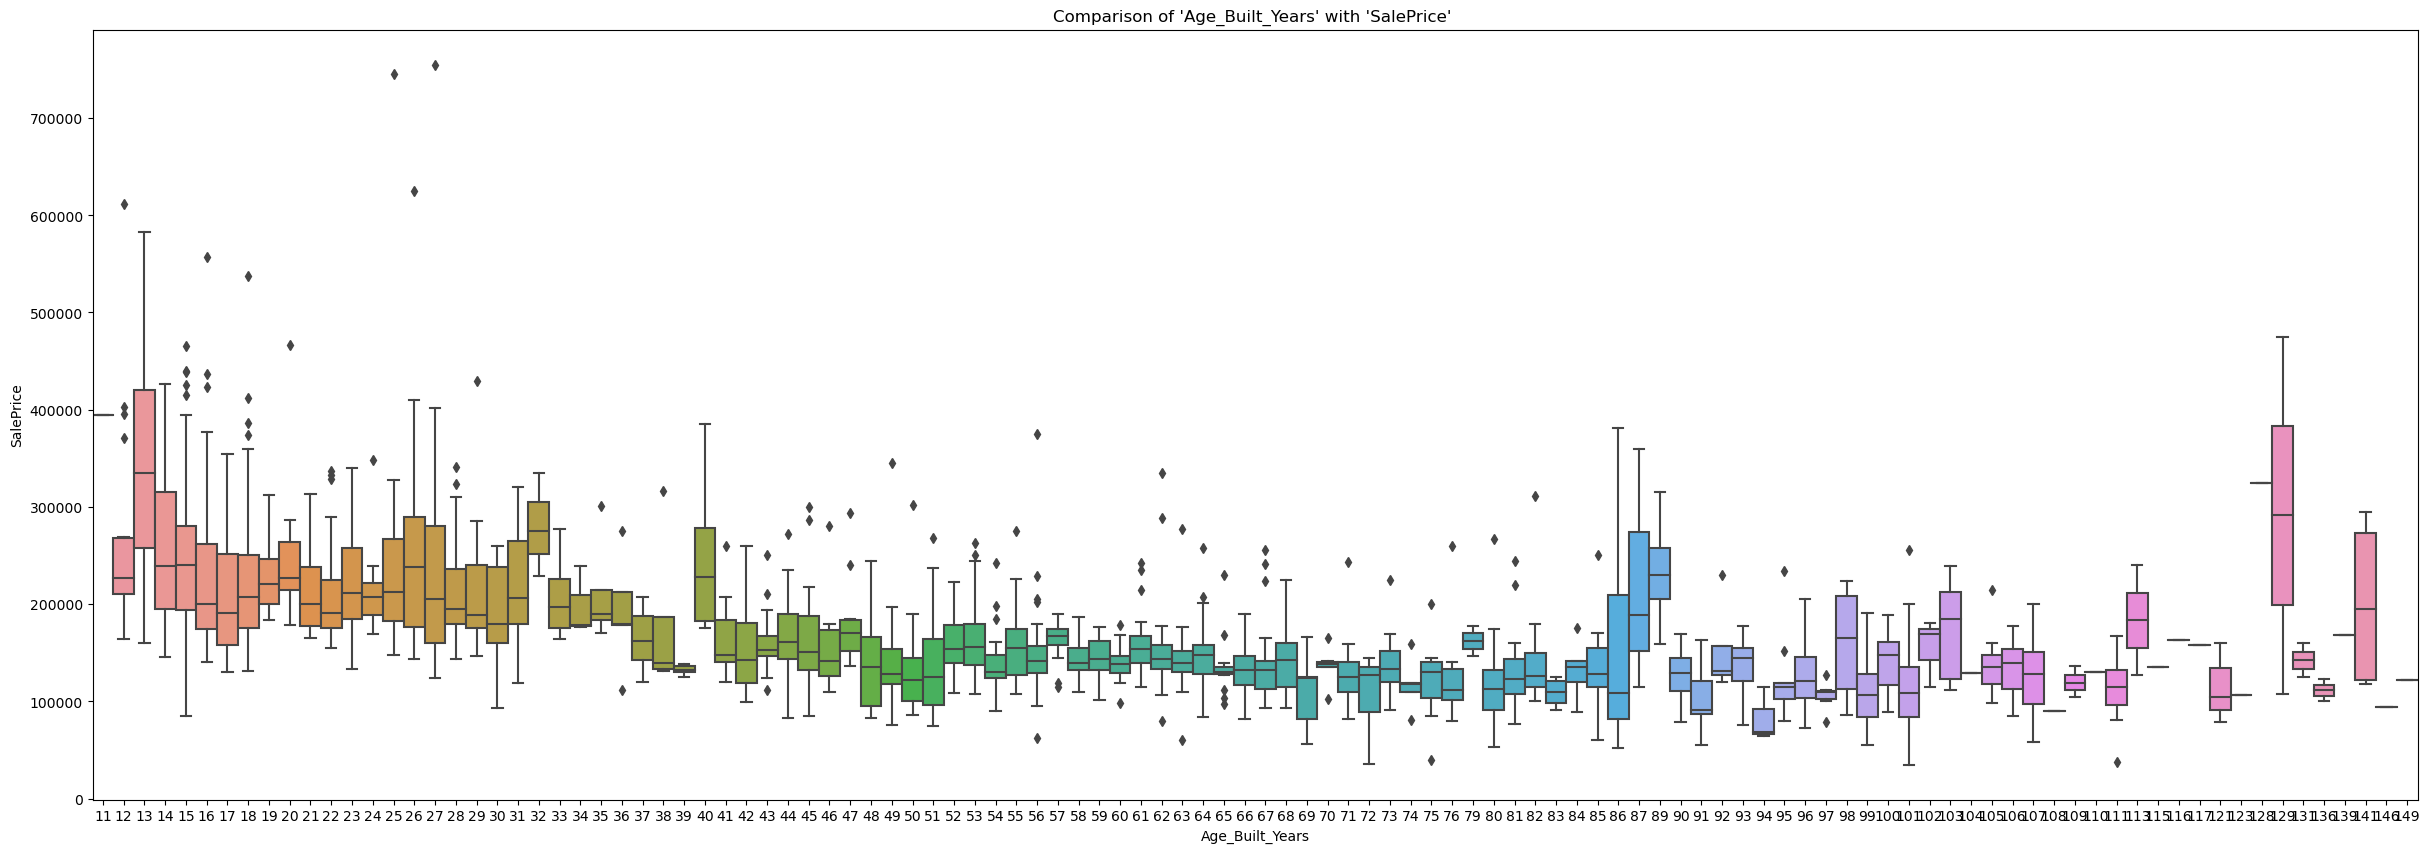

In [75]:
plt.figure(figsize=[30,10])
var = 'Age_Built_Years'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

##### Findings from plots
1.As Basement quality increases, we see a corresponding increase in SalePrice
2.Masonry Veneer Type has higher median Sales Price compared to other Veneer Types
3.As Exterior quality increases , we see a corresponding increase in SalePrice
4.Houses with Central Air conditioning have a higher median price compared to the houses that don't have Central Air conditioning
5.Houses that are partially completed have a higher median Saleprice compared to other categories. This might be because partially completed houses are usually new houses under construction.
6.As the house age increases, we can see that the median SalePrice drops but there are few cases where the SalePrice goes up as well


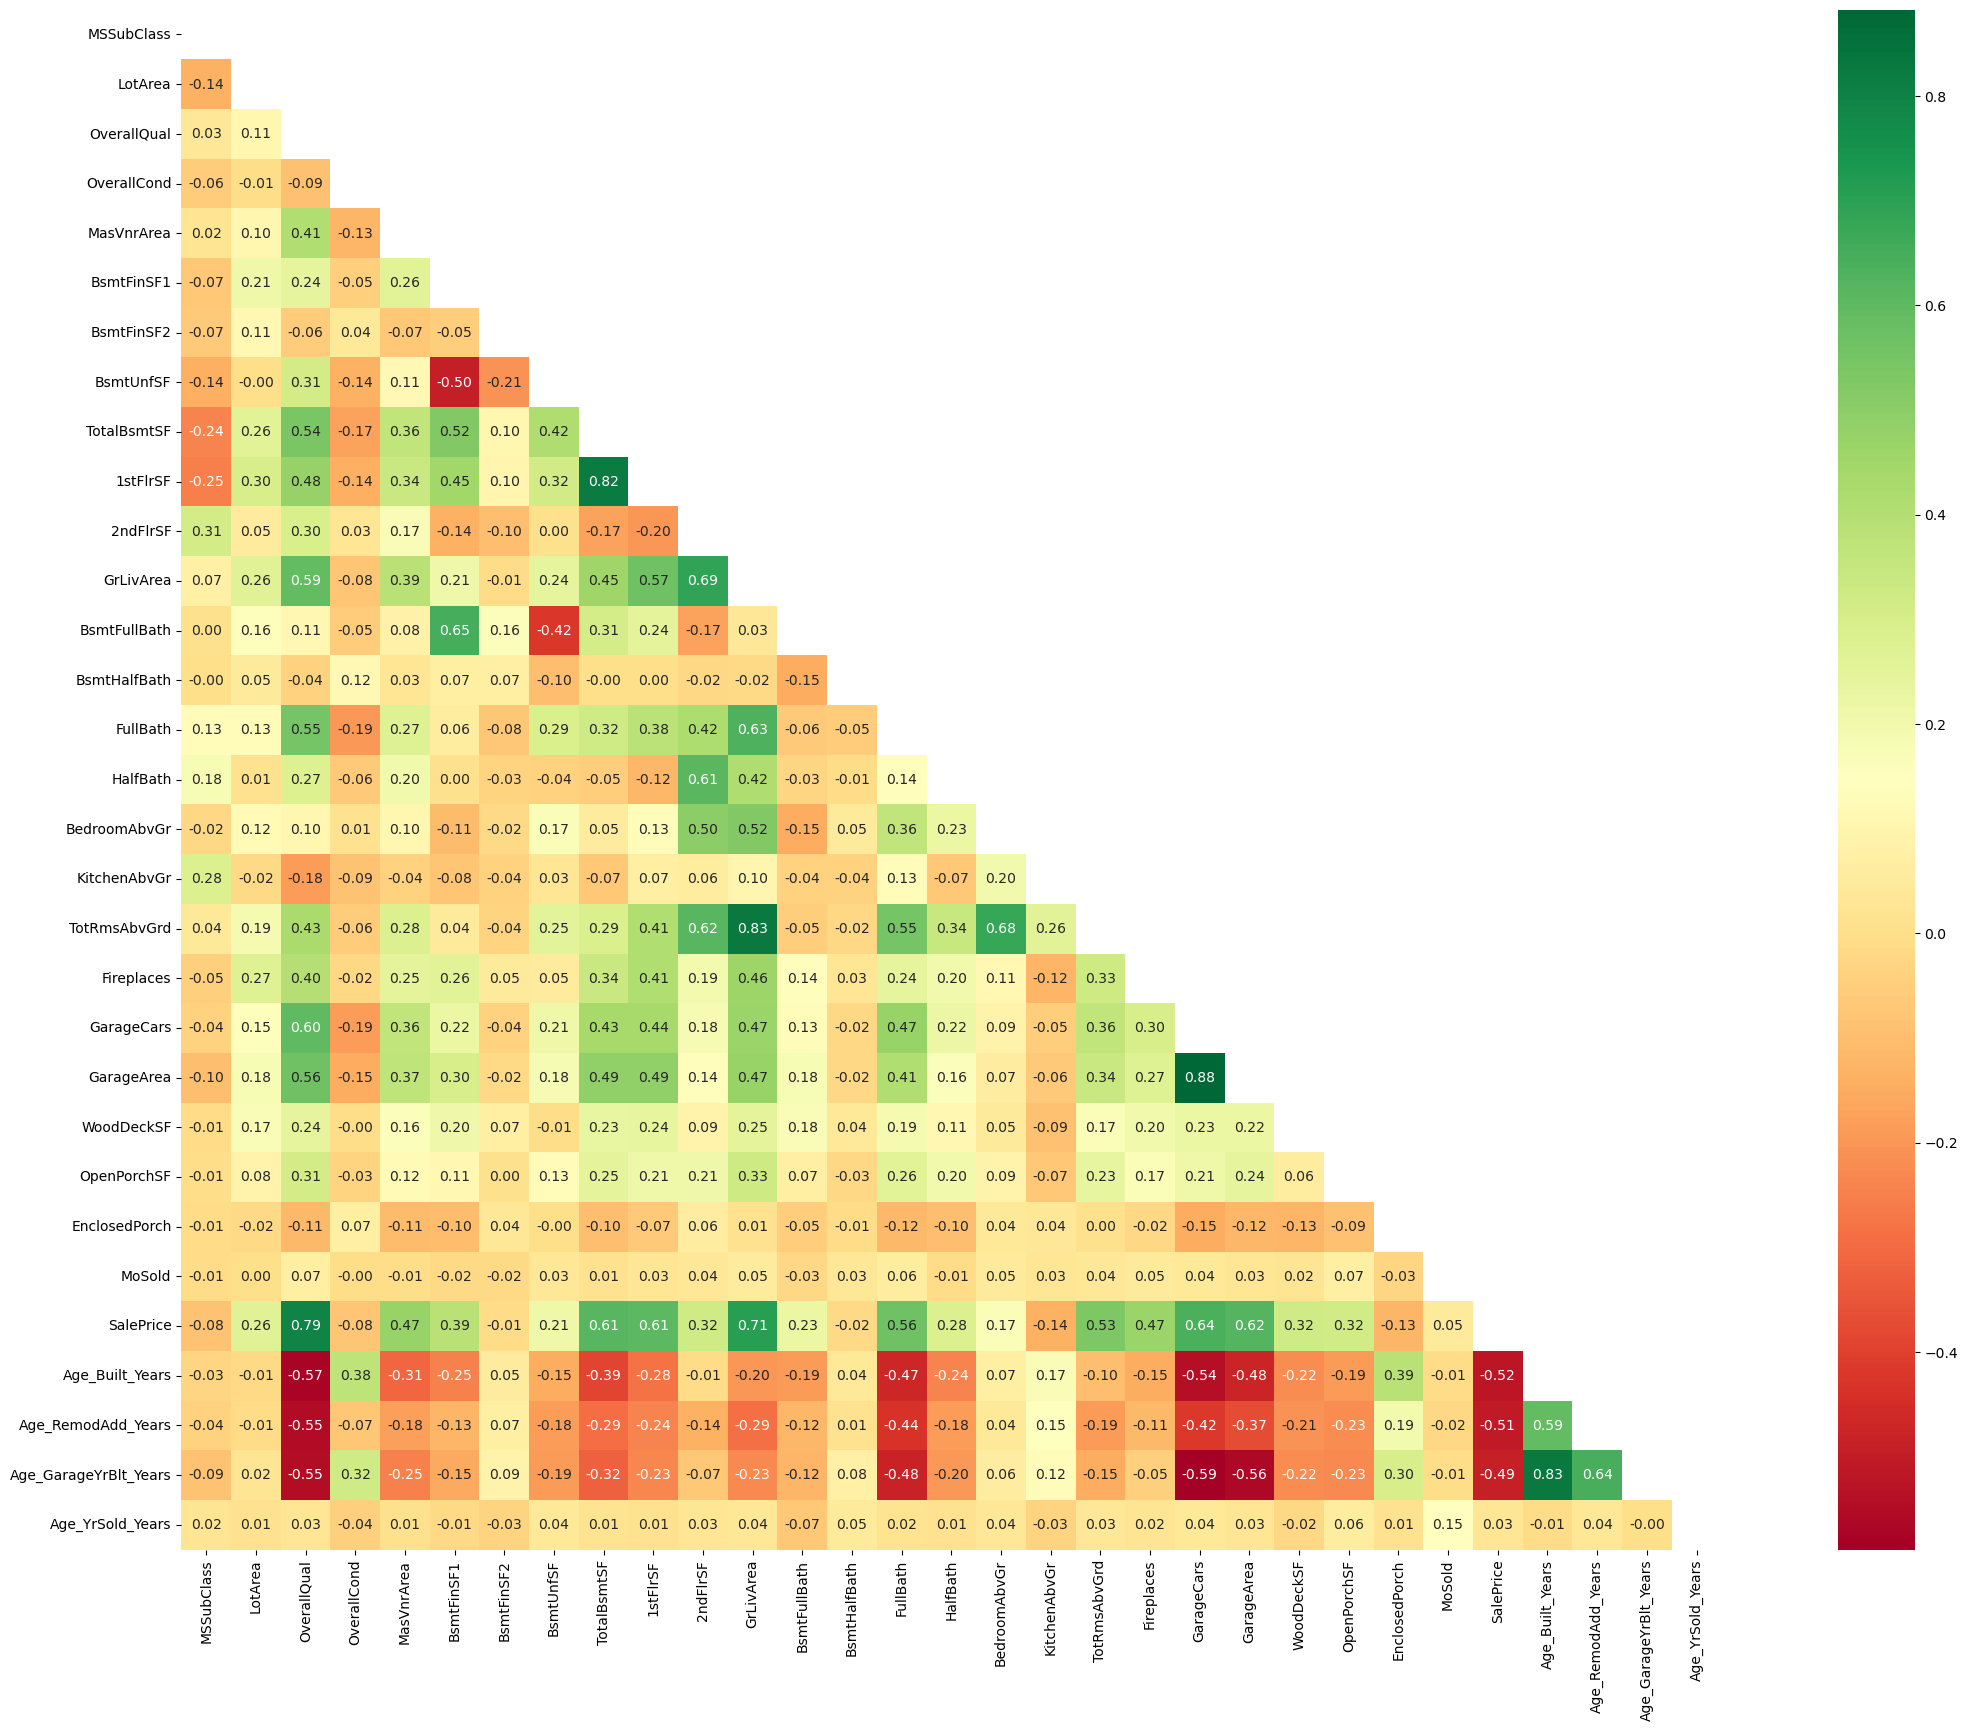

In [76]:
plt.figure(figsize=[30,20])
corr = df.drop(columns='Transformed_SalePrice', axis=1)
corr = corr.corr()
mask=np.triu(np.ones_like(corr)) # Masking upper half of the triangle
sns.heatmap(corr, cmap='RdYlGn', annot=True, fmt='.2f', square=True, mask=mask)
plt.show()

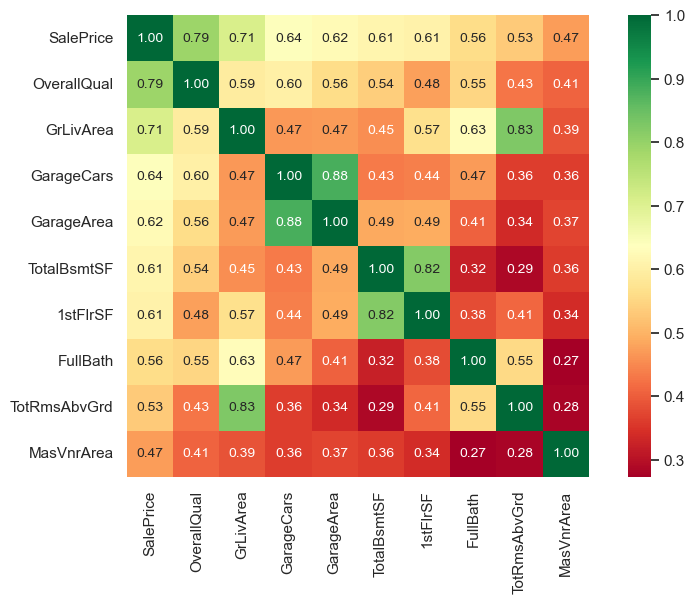

In [77]:
plt.figure(figsize=[10,6])

k = 10 # number of variables for a heatmap
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
corrmatrix = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values, cmap='RdYlGn')
plt.show()

We can see that:

1.GrLivArea and TotaRmsAvbGrad are highly correlated at 0.83
2.TotalBsmtSF and 1stFlrSF are highly correlated at 0.82
3.GarageArea and GarageCars are highly correlated at 0.88
4.OverallQual and SalePrice are highly correlated at o.79

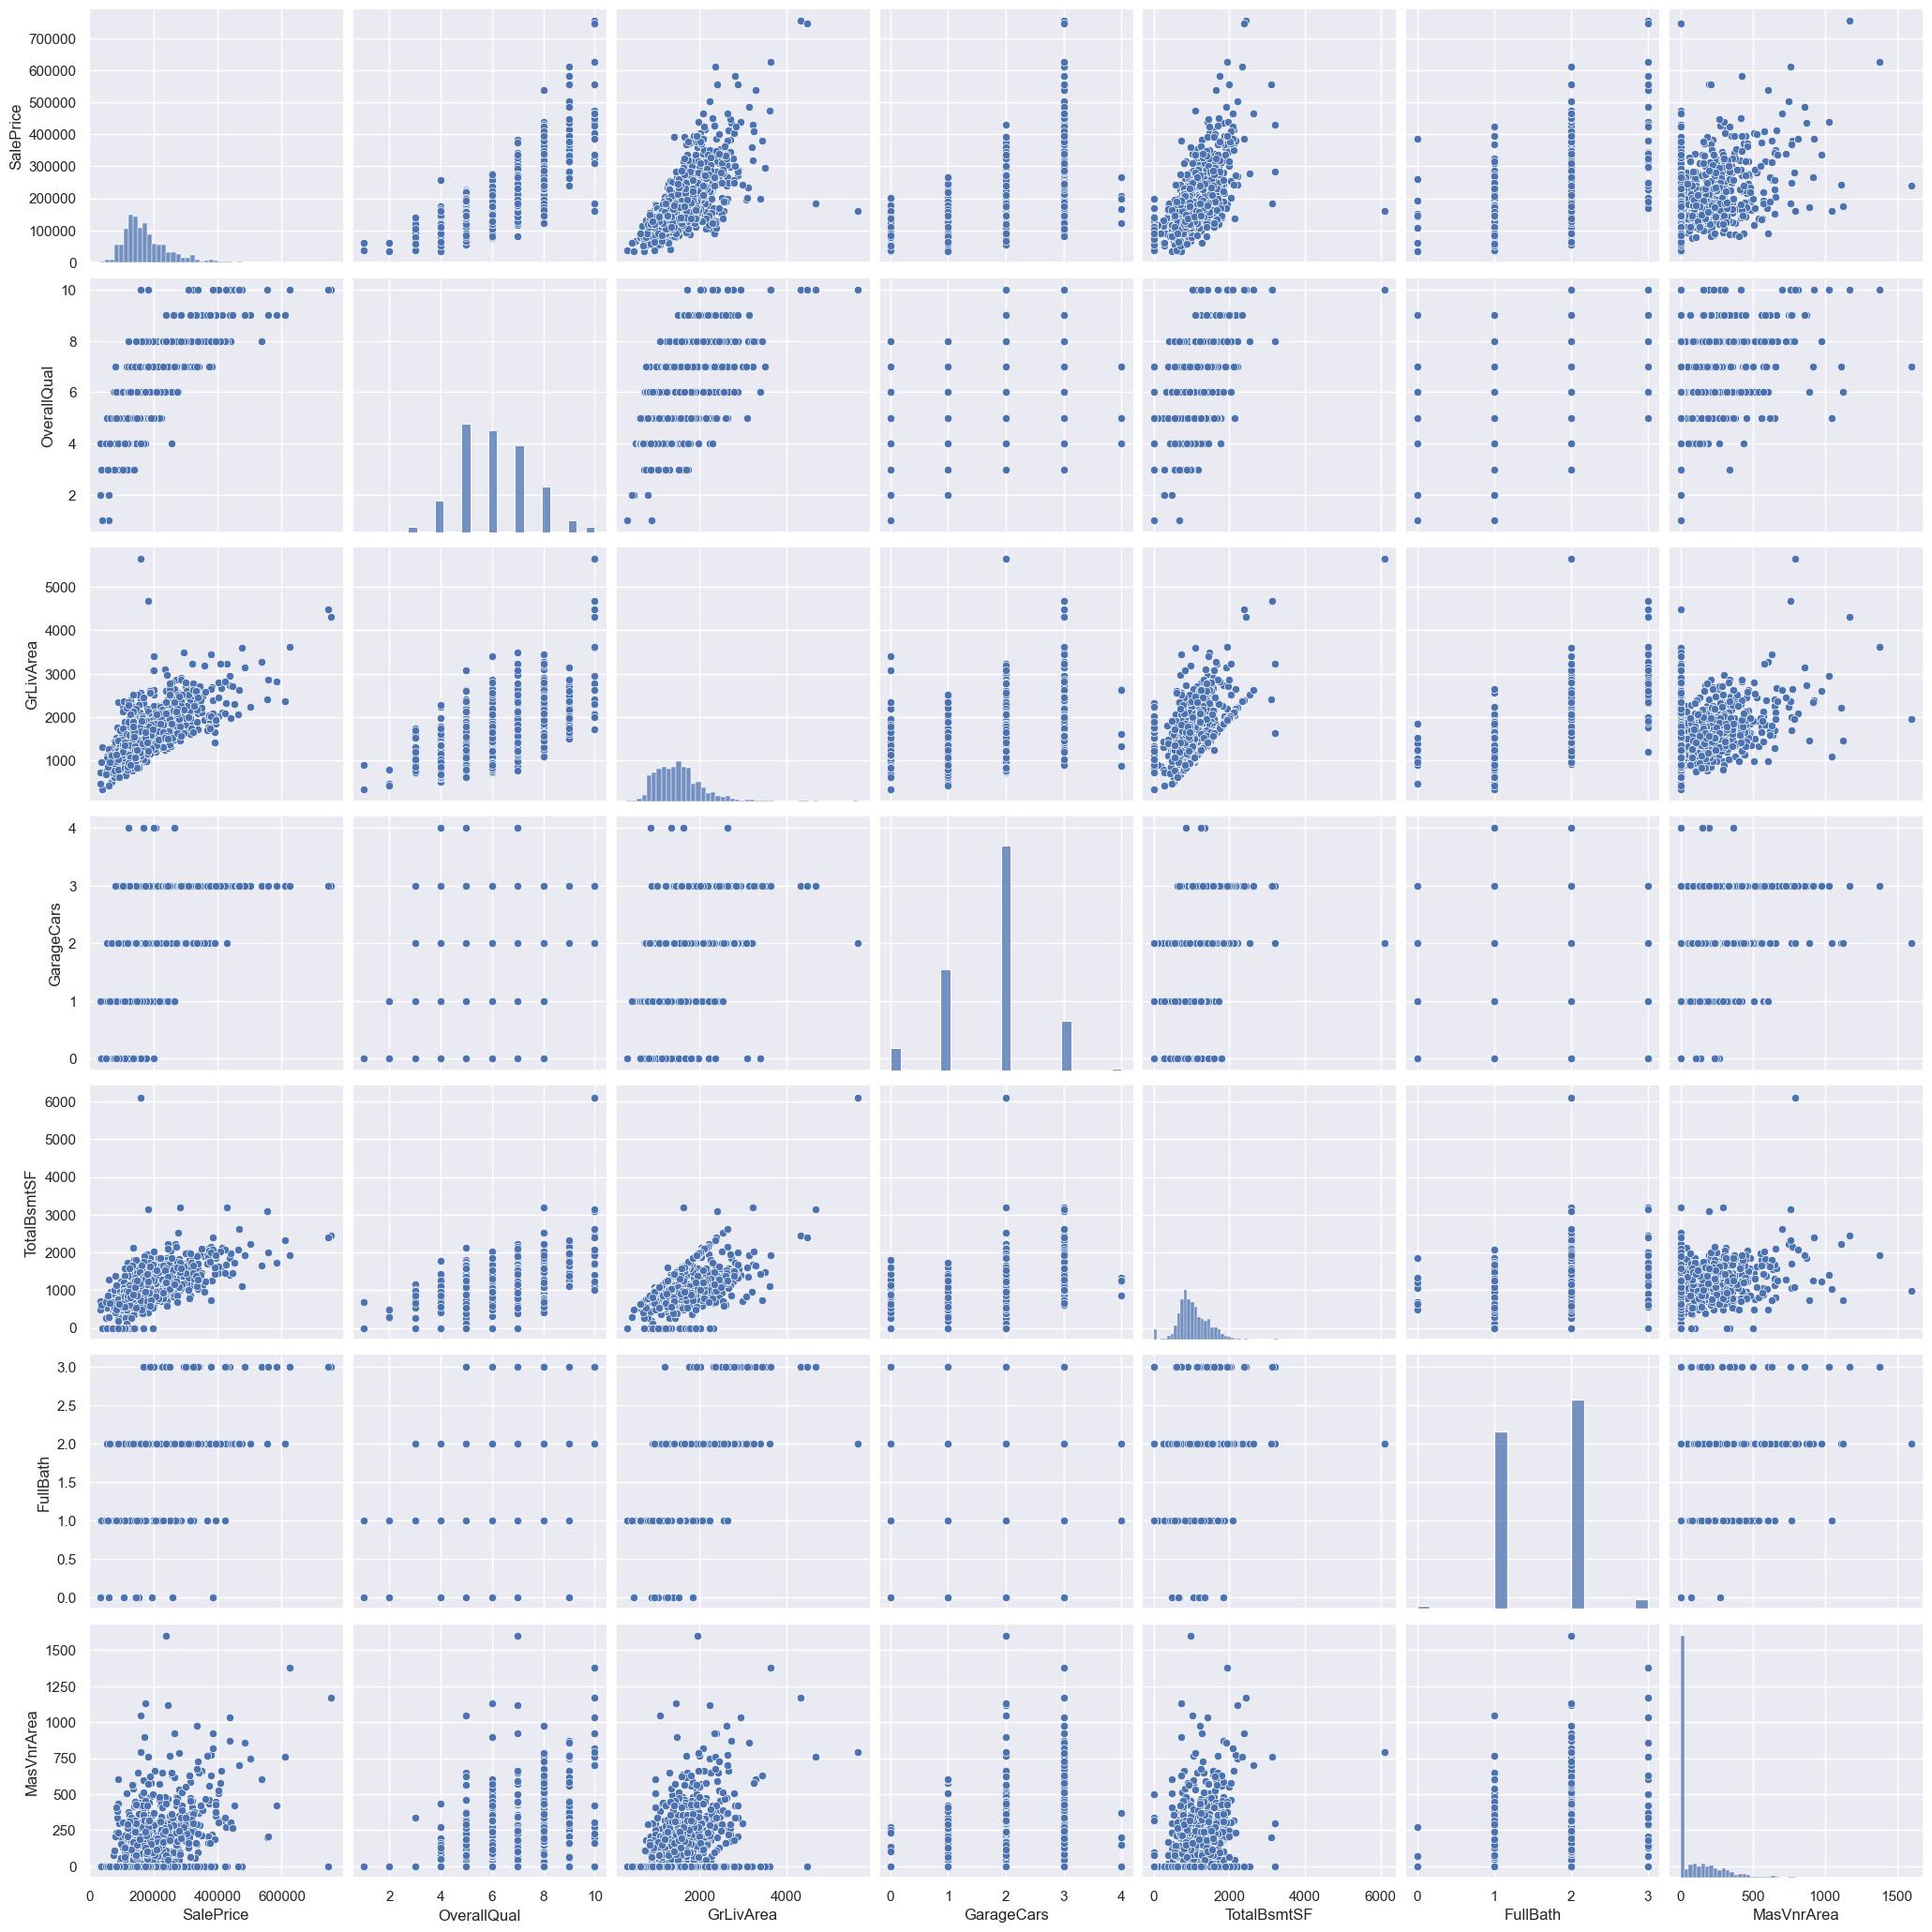

In [80]:
columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea']
sns.pairplot(df[columns], size=3)
plt.show()

##### findings
###### TotalBasementSF, GrLivingArea & OverallQual are linearly correlated with SalePrice
###### TotalBasementSF and GrLivingArea have a positive correlation
###### Distribution of MasVnrArea is skewed to the right

In [81]:
cat_var = df.select_dtypes(include='object').columns
print(len(cat_var))

33


In [82]:
df_categorical = df.select_dtypes(include='object')
df_categorical.columns.shape
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [83]:
df.drop(list(df_categorical.columns), axis=1, inplace=True)
df.shape

(1460, 32)

In [84]:
df = pd.concat([df, df_dummies], axis=1)
df.shape

(1460, 215)

In [85]:
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


##### Train Test split

In [86]:
X = df.drop(['SalePrice','Transformed_SalePrice'], axis=1)
y = df['Transformed_SalePrice']

In [87]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [88]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: Transformed_SalePrice, dtype: float64

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(1022, 213)
(1022,)


In [91]:
print(X_test.shape)
print(y_test.shape)

(438, 213)
(438,)


In [92]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 215 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    MSSubClass             1460 non-null   int64  
 1    LotArea                1460 non-null   int64  
 2    OverallQual            1460 non-null   int64  
 3    OverallCond            1460 non-null   int64  
 4    MasVnrArea             1460 non-null   float64
 5    BsmtFinSF1             1460 non-null   int64  
 6    BsmtFinSF2             1460 non-null   int64  
 7    BsmtUnfSF              1460 non-null   int64  
 8    TotalBsmtSF            1460 non-null   int64  
 9    1stFlrSF               1460 non-null   int64  
 10   2ndFlrSF               1460 non-null   int64  
 11   GrLivArea              1460 non-null   int64  
 12   BsmtFullBath           1460 non-null   int64  
 13   BsmtHalfBath           1460 non-null   int64  
 14   FullBath               1460 non-null  

In [94]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'SalePrice' is the target variable and should not be scaled with features
target_variable = 'SalePrice'

# List of numerical features to be scaled (excluding 'SalePrice')
num_var = [col for col in X_train.columns if col != target_variable and X_train[col].dtype in ['int64', 'float64']]

# Instantiate an object of MinMaxScaler
sc = MinMaxScaler()

# Perform fit and transform on the train dataset
X_train[num_var] = sc.fit_transform(X_train[num_var])

# Perform only transform on the test dataset
X_test[num_var] = sc.transform(X_test[num_var])

# Verify 'SalePrice' is still in the datasets and unaltered
print(X_train.head())
print(X_test.head())


      MSSubClass   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
135     0.000000  0.042534     0.666667        0.625    0.208999    0.000000   
1452    0.941176  0.011101     0.444444        0.500    0.058055    0.096917   
762     0.235294  0.034308     0.666667        0.500    0.000000    0.004252   
932     0.000000  0.048470     0.888889        0.500    0.219158    0.000000   
435     0.235294  0.043782     0.666667        0.625    0.000000    0.068214   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
135     0.000000   0.558219     0.213421  0.309316  ...               0   
1452    0.000000   0.000000     0.089525  0.169344  ...               0   
762     0.000000   0.313356     0.123732  0.098669  ...               0   
932     0.000000   0.815497     0.311784  0.360486  ...               0   
435     0.305235   0.029966     0.130769  0.113125  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
135

In [95]:
print(X_train.shape)
print(X_test.shape)

(1022, 213)
(438, 213)


#### Model using linear regression

In [97]:
from sklearn.linear_model import LinearRegression


In [100]:
from sklearn.impute import SimpleImputer
# Example for imputing numerical features
imputer = SimpleImputer(strategy='mean')
X_train[num_var] = imputer.fit_transform(X_train[num_var])
X_test[num_var] = imputer.transform(X_test[num_var])

# Check if there are any remaining NaNs
print(X_train.isna().sum())
print(X_test.isna().sum())

MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
MasVnrArea               0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 213, dtype: int64
MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
MasVnrArea               0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 213, dtype: int64


In [101]:
# Check for NaNs in X_train and y_train
print(X_train.isna().sum().sum())  # Should be 0 if no NaNs are present
print(y_train.isna().sum().sum())  # Should be 0 if no NaNs are present

0
0


In [102]:
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

In [103]:
# Fit the regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [104]:
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
MSSubClass,-0.038554
LotArea,0.200643
OverallQual,0.461600
OverallCond,0.256535
MasVnrArea,-0.071470
...,...
SaleCondition_AdjLand,0.115385
SaleCondition_Alloca,0.195160
SaleCondition_Family,0.033072
SaleCondition_Normal,0.065727


In [105]:
X_train.shape

(1022, 213)

In [106]:
X_test.shape

(438, 213)

In [107]:
# Import r2_score and mean squared error from library
from sklearn.metrics import r2_score, mean_squared_error

In [108]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric.append(mse_test_lr**0.5)

Train r2 score is : 0.9205977466015727
Test r2 score is : -9.601923079365655e+21
Train RSS score is : 12.578569228011172
Test RSS score is : 7.134710890171936e+23
Train MSE score is : 0.012307797679071598
Test MSE score is : 1.628929426979894e+21


#### test score not good, overfitting, so we will use RFE and remove colums with high VIF

In [109]:
# Importing RFE from library
from sklearn.feature_selection import RFE

In [110]:
X_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=213)

In [119]:
# Assuming X_train, X_test, and y_train are already defined

# List of numerical features
num_var = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

# Impute missing values in numerical features
imputer = SimpleImputer(strategy='mean')
X_train[num_var] = imputer.fit_transform(X_train[num_var])
X_test[num_var] = imputer.transform(X_test[num_var])

# Ensure no NaNs in the target variable
y_train = y_train.dropna()

# Instantiate the Linear Regression model
lm = LinearRegression()

# RFE with the Linear Regression model and 50 features to select
rfe = RFE(estimator=lm, n_features_to_select=50)

# Fit the RFE model
rfe = rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Define 'col' as the selected features
col = selected_features

# Create the new DataFrame with selected features
X_train_rfe = X_train[col]

# Optionally, apply the same transformation to the test set
X_test_rfe = X_test[col]

# Print the selected features
print("Selected features:", selected_features)


Selected features: Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'Age_Built_Years', 'Age_RemodAdd_Years', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_RRNe',
       'BldgType_Twnhs', 'HouseStyle_2.5Unf', 'Exterior1st_BrkComm',
       'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_None', 'BsmtExposure_None',
       'BsmtFinType1_None', 'BsmtFinType2_None', 'HeatingQC_Po',
       'Functional_Maj2', 'Functional_Sev', 'GarageCond_Po', 'SaleType_ConLD',
       'SaleType_Oth', 'SaleCondition

In [120]:
X_train_rfe.shape

(1022, 50)

In [121]:
# Importing required statsmodels library
import statsmodels.api as sm

# From statsmodels importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
# Functions to build model using statsmodels and check VIF
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [123]:
X_train_new = build_model(X_train_rfe,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.891
Model:                               OLS   Adj. R-squared:                  0.886
Method:                    Least Squares   F-statistic:                     170.1
Date:                   Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                           14:52:27   Log-Likelihood:                 636.91
No. Observations:                   1022   AIC:                            -1178.
Df Residuals:                        974   BIC:                            -941.2
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

##### strong multicollinearity problems or that the design matrix is singular.

In [124]:
HighVIF = checkVIF(X_train_new)

In [125]:
HighVIF[ HighVIF['VIF'] >=5 ]

,Features,VIF
43,BsmtFinType2_None,inf
42,BsmtFinType1_None,inf
40,BsmtCond_None,inf
41,BsmtExposure_None,inf
0,const,425.34
9,GrLivArea,148.15
8,2ndFlrSF,103.64
7,1stFlrSF,83.46
19,MSZoning_RL,49.49
20,MSZoning_RM,38.17


In [126]:
highVIF_columns = list(HighVIF[ HighVIF['VIF'] >=5 ].Features.values)
len(highVIF_columns)

16

In [127]:
highVIF_columns.remove('const')

In [128]:
highVIF_columns

['BsmtFinType2_None',
 'BsmtFinType1_None',
 'BsmtCond_None',
 'BsmtExposure_None',
 'GrLivArea',
 '2ndFlrSF',
 '1stFlrSF',
 'MSZoning_RL',
 'MSZoning_RM',
 'MSZoning_FV',
 'BsmtQual_TA',
 'BsmtQual_Gd',
 'BsmtFinSF1',
 'Age_Built_Years',
 'TotRmsAbvGrd']

In [129]:
highVIF_columns.remove('TotRmsAbvGrd')

In [130]:
highVIF_columns

['BsmtFinType2_None',
 'BsmtFinType1_None',
 'BsmtCond_None',
 'BsmtExposure_None',
 'GrLivArea',
 '2ndFlrSF',
 '1stFlrSF',
 'MSZoning_RL',
 'MSZoning_RM',
 'MSZoning_FV',
 'BsmtQual_TA',
 'BsmtQual_Gd',
 'BsmtFinSF1',
 'Age_Built_Years']

In [131]:
len(highVIF_columns)

14

In [132]:
X_train_rfe.shape

(1022, 50)

In [133]:
X_train_rfe.drop(highVIF_columns, axis=1, inplace=True)

In [134]:
X_train_rfe.shape

(1022, 36)

In [135]:
X_train_rfe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtUnfSF,BsmtFullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,...,Exterior1st_Wd Sdng,Exterior2nd_Wd Sdng,BsmtQual_Fa,HeatingQC_Po,Functional_Maj2,Functional_Sev,GarageCond_Po,SaleType_ConLD,SaleType_Oth,SaleCondition_Alloca
135,0.000000,0.042534,0.666667,0.625,0.558219,0.000000,0.375,0.416667,0.333333,0.50,...,0,0,0,0,0,0,0,0,0,0
1452,0.941176,0.011101,0.444444,0.500,0.000000,0.333333,0.250,0.250000,0.000000,0.50,...,0,0,0,0,0,0,0,0,0,0
762,0.235294,0.034308,0.666667,0.500,0.313356,0.000000,0.375,0.416667,0.000000,0.50,...,0,0,0,0,0,0,0,0,0,0
932,0.000000,0.048470,0.888889,0.500,0.815497,0.000000,0.375,0.500000,0.333333,0.75,...,0,0,0,0,0,0,0,0,0,0
435,0.235294,0.043782,0.666667,0.625,0.029966,0.333333,0.375,0.333333,0.333333,0.50,...,0,0,0,0,0,0,0,0,0,0


##### creating another Model final Mode;

In [136]:
# 1. Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# 2. Create model
lr = sm.OLS(y_train,X_train_lm)

# 3. Fit the model
lm = lr.fit()

# 4. View the parameters
lm.params

const                   10.883225
MSSubClass              -0.137817
LotArea                  0.585795
OverallQual              1.044639
OverallCond              0.082801
BsmtUnfSF               -0.018447
BsmtFullBath             0.234316
BedroomAbvGr             0.152138
TotRmsAbvGrd             0.412027
Fireplaces               0.206458
GarageCars               0.465256
Age_RemodAdd_Years      -0.192063
MSZoning_RH             -0.022235
LotShape_IR3            -0.171641
LandContour_HLS          0.114391
LandContour_Low          0.098938
LandContour_Lvl          0.090841
Neighborhood_ClearCr     0.157958
Neighborhood_Crawfor     0.139068
Neighborhood_NoRidge     0.175382
Neighborhood_NridgHt     0.112745
Neighborhood_StoneBr     0.188191
Neighborhood_Veenker     0.142008
Condition1_RRNe          0.149856
BldgType_Twnhs          -0.069663
HouseStyle_2.5Unf       -0.055434
Exterior1st_BrkComm     -0.334965
Exterior1st_Wd Sdng     -0.131309
Exterior2nd_Wd Sdng      0.094828
BsmtQual_Fa   

In [137]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.855
Model:                               OLS   Adj. R-squared:                  0.850
Method:                    Least Squares   F-statistic:                     161.9
Date:                   Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                           14:59:12   Log-Likelihood:                 490.82
No. Observations:                   1022   AIC:                            -907.6
Df Residuals:                        985   BIC:                            -725.2
Df Model:                             36                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.8832      0.050    216.475      0.000      10.785      10.982
MSSubClass              -0.1378      0.022     -6.239      0.000      -0.181      -0.094
LotArea                  0.5858      0.111      5.270      0.000       0.368       0.804
OverallQual              1.0446      0.051     20.463      0.000       0.944       1.145
OverallCond              0.0828      0.038      2.153      0.032       0.007       0.158
BsmtUnfSF               -0.0184      0.032     -0.575      0.566      -0.081       0.045
BsmtFullBath             0.2343      0.033      7.010      0.000       0.169       0.300
BedroomAbvGr             0.1521      0.073      2.082      0.038       0.009       0.296
TotRmsAbvGrd             0.4120      0.061      6.808      0.000       0.293       0.531
Fireplaces               0.2065      0.027      7.769      0.000       0.154       0.259
GarageCars               0.4653      0.035     13.236      0.000       0.396       0.534
Age_RemodAdd_Years      -0.1921      0.018    -10.689      0.000      -0.227      -0.157
MSZoning_RH             -0.0222      0.044     -0.509      0.611      -0.108       0.063
LotShape_IR3            -0.1716      0.058     -2.959      0.003      -0.285      -0.058
LandContour_HLS          0.1144      0.039      2.944      0.003       0.038       0.191
LandContour_Low          0.0989      0.044      2.230      0.026       0.012       0.186
LandContour_Lvl          0.0908      0.026      3.451      0.001       0.039       0.143
Neighborhood_ClearCr     0.1580      0.040      3.952      0.000       0.080       0.236
Neighborhood_Crawfor     0.1391      0.028      4.931      0.000       0.084       0.194
Neighborhood_NoRidge     0.1754      0.031      5.662      0.000       0.115       0.236
Neighborhood_NridgHt     0.1127      0.025      4.567      0.000       0.064       0.161
Neighborhood_StoneBr     0.1882      0.037      5.105      0.000       0.116       0.261
Neighborhood_Veenker     0.1420      0.055      2.572      0.010       0.034       0.250
Condition1_RRNe          0.1499      0.153      0.980      0.327      -0.150       0.450
BldgType_Twnhs          -0.0697      0.032     -2.148      0.032      -0.133      -0.006
HouseStyle_2.5Unf       -0.0554      0.053     -1.048      0.295      -0.159       0.048
Exterior1st_BrkComm     -0.3350      0.109     -3.067      0.002      -0.549      -0.121
Exterior1st_Wd Sdng     -0.1313      0.028     -4.725      0.000      -0.186      -0.077
Exterior2nd_Wd Sdng      0.0948      0.028      3.344      0.001       0.039       0.150
BsmtQual_Fa             -0.0423      0.031     -1.359      0.175      -0.103       0.019
HeatingQC_Po            -0.2831      0.153     -1.847      0.065      -0.584       0.018
Functional_Maj2         

In [138]:
print(X_train_rfe.shape)
print(X_test.shape)

(1022, 36)
(438, 213)


In [139]:
names = X_train_rfe.columns

In [141]:
X_test_new = X_test[names]
X_test_new.shape

(438, 36)

In [142]:
X_test_new = sm.add_constant(X_test_new)
X_test_new.shape

(438, 37)

In [143]:
y_pred_train = lm.predict(X_train_lm)
y_pred_test = lm.predict(X_test_new)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_lr.append(mse_test_lr**0.5)

Train r2 score is : 0.8554446011156722
Test r2 score is : 0.8213215402006441
Train RSS score is : 22.899855033400108
Test RSS score is : 13.276706576718727
Train MSE score is : 0.022406903163796583
Test MSE score is : 0.030312115471960565


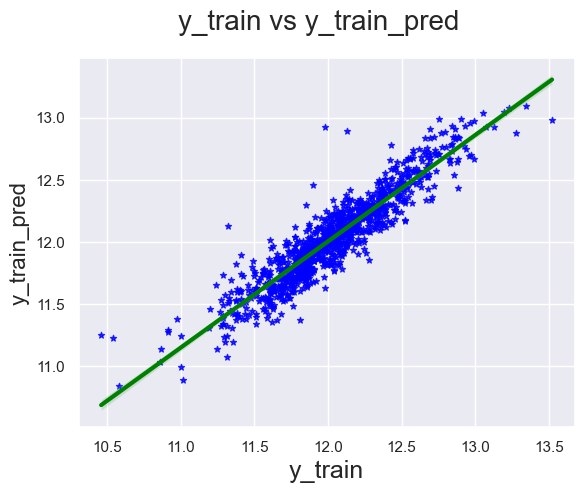

In [144]:
# plotting figure with train data
fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_train,y=y_pred_train, scatter_kws = {"color": 'blue',"s": 20}, line_kws = {"color": 'green', "lw": 3}, marker='*')
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)
plt.show()

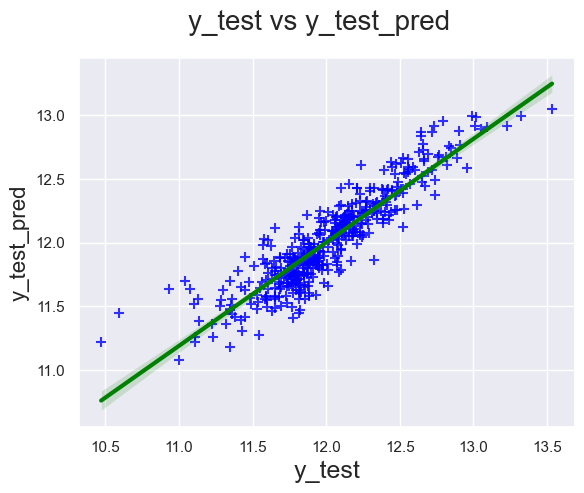

In [145]:
#ploting grapg with Test data
fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_test,y=y_pred_test, scatter_kws = {"color": 'blue',"s": 50}, line_kws = {"color": 'green', "lw": 3}, marker='+')
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

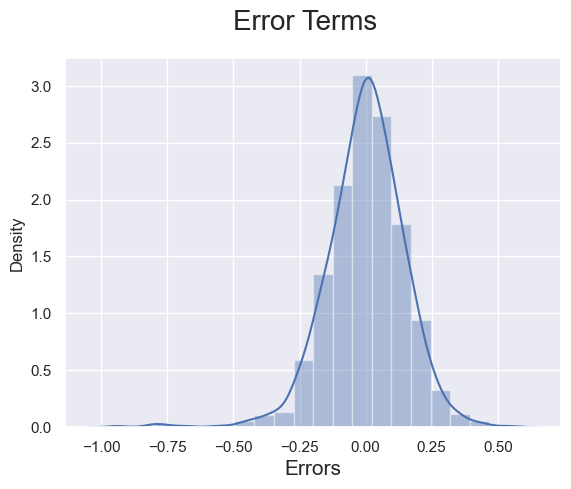

In [146]:
# Residual Analysis of Train
res = y_train - y_pred_train
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

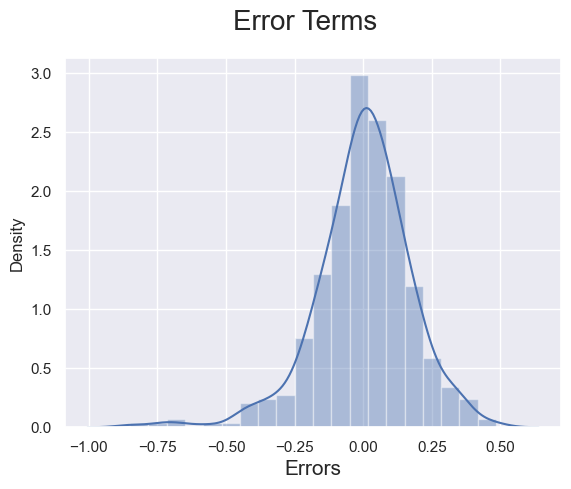

In [147]:
# for test
res = y_test - y_pred_test
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

Based on our analysis using regular Linear Regression, the residuals are centered around zero and exhibit a normal distribution, satisfying the assumptions of linear regression. The predictions for both the training and test datasets display a linear relationship when compared to the actual values.

Performance metrics indicate:

The train R² score is: 0.8537
The test R² score is: 0.8348
These results suggest a strong fit, but to enhance model performance on unseen data and mitigate overfitting, we will proceed with Lasso and Ridge Regression.

Both Ridge and Lasso Regression introduce regularization, allowing the model to accept a degree of bias to significantly reduce variance. This process helps in refining model coefficients towards zero, enhancing generalizability to new data.

In particular, Lasso Regression not only shrinks the coefficients but can also set some of them to zero. This feature selection property of Lasso simplifies model interpretation, especially when dealing with a large number of predictors.











In [148]:
#Linear Regression features and coefficients
df_linear = pd.DataFrame(index=X_train_rfe.columns)
df_linear.rows = X_train_rfe.columns
df_linear['Linear'] = lm.params
df_linear

,Linear
MSSubClass,-0.137817
LotArea,0.585795
OverallQual,1.044639
OverallCond,0.082801
BsmtUnfSF,-0.018447
BsmtFullBath,0.234316
BedroomAbvGr,0.152138
TotRmsAbvGrd,0.412027
Fireplaces,0.206458
GarageCars,0.465256


In [149]:
names = X_train_rfe.columns
print(len(names))
print(list(names))

36
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'BsmtFullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'Age_RemodAdd_Years', 'MSZoning_RH', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_RRNe', 'BldgType_Twnhs', 'HouseStyle_2.5Unf', 'Exterior1st_BrkComm', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'BsmtQual_Fa', 'HeatingQC_Po', 'Functional_Maj2', 'Functional_Sev', 'GarageCond_Po', 'SaleType_ConLD', 'SaleType_Oth', 'SaleCondition_Alloca']


#### Lasso Regression

In [150]:
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [151]:
X_train = X_train[names]
X_test = X_test[names]
print(X_train.shape)
print(X_test.shape)

(1022, 36)
(438, 36)


In [152]:

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [153]:
# lasso with 5 folds
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [154]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007014,0.004736,0.002601,0.000486,0.0001,{'alpha': 0.0001},-0.118646,-0.123827,-0.117944,-0.117196,...,-0.116556,0.006152,1,-0.111175,-0.108277,-0.109742,-0.111530,-0.112991,-0.110743,0.001609
1,0.005445,0.000789,0.002023,0.000699,0.001,{'alpha': 0.001},-0.119966,-0.124911,-0.122778,-0.123934,...,-0.119566,0.006865,2,-0.114206,-0.112902,-0.114484,-0.116486,-0.117880,-0.115192,0.001767
2,0.004577,0.000802,0.002438,0.000536,0.01,{'alpha': 0.01},-0.143982,-0.153114,-0.166107,-0.152840,...,-0.149597,0.011302,3,-0.150941,-0.144050,-0.147685,-0.147395,-0.152830,-0.148580,0.003045
3,0.005180,0.001712,0.002533,0.000738,0.05,{'alpha': 0.05},-0.272997,-0.271448,-0.304363,-0.264130,...,-0.271555,0.019222,4,-0.270532,-0.272349,-0.265765,-0.271593,-0.275803,-0.271208,0.003245
4,0.003470,0.000942,0.002009,0.000602,0.1,{'alpha': 0.1},-0.307211,-0.307017,-0.337920,-0.298885,...,-0.306623,0.018123,5,-0.305782,-0.306035,-0.298945,-0.308219,-0.312146,-0.306225,0.004296


In [155]:
cv_results.shape

(28, 21)

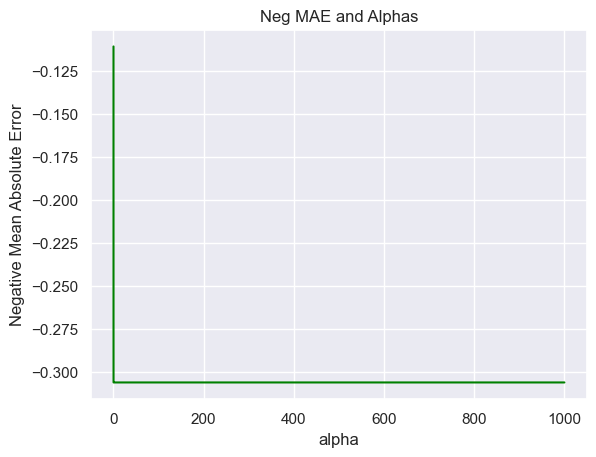

In [156]:
# alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='green')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

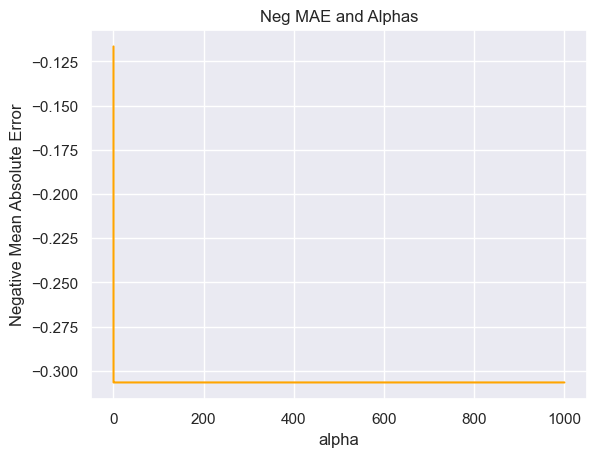

In [157]:
#test with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='orange')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

#### Optimal value of Lambda

In [158]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.0001

In [159]:
#final Lasso Model
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [160]:
lasso.coef_

array([-0.13507678,  0.53806093,  1.04194831,  0.0797433 , -0.01353198,
        0.2392591 ,  0.1412634 ,  0.41925895,  0.208574  ,  0.46270919,
       -0.19314565, -0.01654032, -0.15454889,  0.10661758,  0.09202247,
        0.08272472,  0.15632402,  0.13464953,  0.17133715,  0.10916991,
        0.18104292,  0.1295829 ,  0.04821446, -0.06900257, -0.04843712,
       -0.28318504, -0.12534652,  0.0882853 , -0.03912708, -0.18080675,
       -0.31381926, -0.16788278,  0.01048833,  0.        ,  0.17543733,
        0.09703658])

In [161]:
##Lasso features and their co-efficients
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
MSSubClass,-0.135077
LotArea,0.538061
OverallQual,1.041948
OverallCond,0.079743
BsmtUnfSF,-0.013532
BsmtFullBath,0.239259
BedroomAbvGr,0.141263
TotRmsAbvGrd,0.419259
Fireplaces,0.208574
GarageCars,0.462709


In [162]:
# Lasso model evaluation:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_l.append(mse_test_lr**0.5)



Train r2 score is : 0.854978342722593
Test r2 score is : 0.8252078354822693
Train RSS score is : 22.973717716440852
Test RSS score is : 12.987935327052904
Train MSE score is : 0.022479175847789485
Test MSE score is : 0.029652820381399325


#### Ridge Regression

In [163]:
# Get only 32 features for both X_train and X_test
X_train = X_train[names]
X_test = X_test[names]
print(X_train.shape)
print(X_test.shape)

(1022, 36)
(438, 36)


In [164]:
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [165]:
# ridge with 5 folds

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [166]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007219,0.003915,0.003195,0.000461,0.0001,{'alpha': 0.0001},-0.118161,-0.124068,-0.117819,-0.116871,...,-0.116448,0.006114,1,-0.111016,-0.107909,-0.109422,-0.111120,-0.112704,-0.110434,0.001635
1,0.005264,0.001232,0.004128,0.000978,0.001,{'alpha': 0.001},-0.118164,-0.124064,-0.117820,-0.116873,...,-0.116448,0.006113,2,-0.111017,-0.107910,-0.109424,-0.111121,-0.112706,-0.110435,0.001635
2,0.003875,0.000494,0.002958,0.000100,0.01,{'alpha': 0.01},-0.118192,-0.124025,-0.117821,-0.116891,...,-0.116448,0.006108,3,-0.111025,-0.107924,-0.109443,-0.111137,-0.112720,-0.110450,0.001634
3,0.004682,0.000574,0.002695,0.000593,0.05,{'alpha': 0.05},-0.118315,-0.123864,-0.117828,-0.116968,...,-0.116452,0.006087,4,-0.111060,-0.107992,-0.109522,-0.111204,-0.112780,-0.110512,0.001628
4,0.004523,0.001226,0.003305,0.000596,0.1,{'alpha': 0.1},-0.118464,-0.123686,-0.117885,-0.117060,...,-0.116468,0.006071,5,-0.111101,-0.108072,-0.109615,-0.111285,-0.112853,-0.110585,0.001622


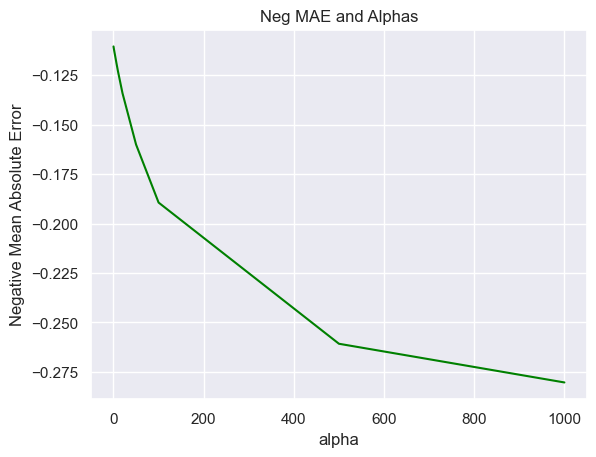

In [167]:
# plot Train datasets
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='green')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

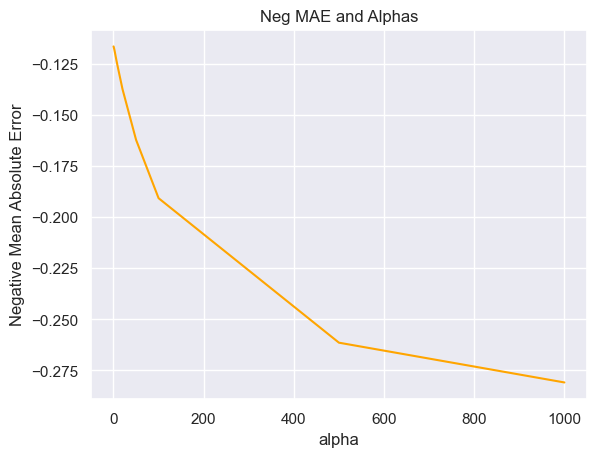

In [168]:
# plot test datasets
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='orange')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

In [169]:
### optimal values of lambda
optimalvalue_ridge = model_cv.best_params_['alpha']
optimalvalue_ridge



0.0001

In [170]:
# Ridge Model
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [171]:
ridge.coef_

array([-0.13781615,  0.58576444,  1.0446299 ,  0.0828015 , -0.01844479,
        0.23431826,  0.1521388 ,  0.41202829,  0.20646115,  0.46525634,
       -0.19206476, -0.02223531, -0.17163471,  0.11439155,  0.09893927,
        0.09083997,  0.15795909,  0.13906676,  0.17538243,  0.11274576,
        0.18819151,  0.14200745,  0.1498421 , -0.06966369, -0.05543395,
       -0.33494796, -0.13130773,  0.09482689, -0.04230266, -0.2831086 ,
       -0.33695648, -0.27282302,  0.04735578,  0.0159084 ,  0.28191683,
        0.11664243])

In [172]:
# Ridge features
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
MSSubClass,-0.137816
LotArea,0.585764
OverallQual,1.044630
OverallCond,0.082801
BsmtUnfSF,-0.018445
BsmtFullBath,0.234318
BedroomAbvGr,0.152139
TotRmsAbvGrd,0.412028
Fireplaces,0.206461
GarageCars,0.465256


In [173]:
# Ridge Model evaluation
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_r.append(mse_test_lr**0.5)

Train r2 score is : 0.8554446010765238
Test r2 score is : 0.8213221018264367
Train RSS score is : 22.89985503960184
Test RSS score is : 13.276664845102824
Train MSE score is : 0.022406903169864812
Test MSE score is : 0.030312020194298683


In [174]:
#comparing results of Regularization lasso and Ridge with Linear regression
comparison = pd.DataFrame(index=X_train.columns)
comparison.rows = X_train.columns

comparison['Linear'] = lm.params
comparison['Ridge'] = ridge.coef_
comparison['Lasso'] = lasso.coef_
comparison.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso
OverallQual,1.044639,1.044630,1.041948
LotArea,0.585795,0.585764,0.538061
GarageCars,0.465256,0.465256,0.462709
TotRmsAbvGrd,0.412027,0.412028,0.419259
BsmtFullBath,0.234316,0.234318,0.239259
Fireplaces,0.206458,0.206461,0.208574
Neighborhood_StoneBr,0.188191,0.188192,0.181043
SaleType_Oth,0.281947,0.281917,0.175437
Neighborhood_NoRidge,0.175382,0.175382,0.171337
Neighborhood_ClearCr,0.157958,0.157959,0.156324


In [175]:
#comparisons of metrics after regularization

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric_r, name = 'Ridge Regression')
ls_metric = pd.Series(metric_l, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.855445,0.855445,0.854978
1,R2 Score (Test),0.821322,0.821322,0.825208
2,RSS (Train),22.899855,22.899855,22.973718
3,RSS (Test),13.276707,13.276665,12.987935
4,MSE (Train),0.149689,0.149689,0.149931
5,MSE (Test),0.174104,0.174103,0.172200


### Observations
##### The model identifies 32 significant features.
##### Features are ranked by the magnitude of their coefficients, with the most significant feature listed first.
##### After applying Ridge and Lasso Regression for regularization, the coefficients remain close to those produced by Linear Regression, exhibiting only slight variations.
#####  Despite these minor variations, the order of feature significance remains consistent across all models.
##### The R² Score, RSS, and MSE are comparable across the Linear Regression, Ridge, and Lasso models.
##### Lasso Regression achieves marginally better scores compared to both Ridge and Linear Regression.